<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;a:link{color: white}">
    <h1 style='color:GhostWhite;'>Part 3: Should This Loan be Approved or Denied ?</h1>
    This is Part 3 of notebook <a style="color:yellow" href="https://www.kaggle.com/code/josephramon/sba-xgboost-model">Part 1: Should This Loan Be Approved or Denied ?</a><br><br>
    This notebook is divided into 3 main parts:<br>
<ul>
<li><a style="color:Gold;" href="#part1"><b>1. tf.Keras Binary Classification Model</b></a></li>
<li><a style="color:Gold;" href="#part2"><b>2. Optuna Hyperparameter Tuning</b></a> </li>
<li><a style="color:Gold;" href="#part3"><b>3. Keras Tuner Hyperparameter Tuning</b></a> </li>
</ul>
<br>
    <i><b>Output from <a style="color:Gold;" href = "https://www.kaggle.com/code/josephramon/sba-xgboost-model">Part 1 notebook</a> are Input to this notebook.</b></i><br><br>
    The techniques covered here are :<br>
    <p style="color:Gold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Deep Learning: keras Binary Classification</b></p>
    <p style="color:Gold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>keras.experimental.WideDeepModel</b></p>
    <p style="color:Gold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Optuna Hyperparameter Tuning for Keras</b></p>
    <p style="color:Gold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Keras Tuner Hyperparameter Tuning</b></p>
    </div>

<div class="alert alert-block alert-success">  
    <b>Dataset Source</b><br>
    <a href="https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied">U.S. Small Business Administration (SBA) Dataset</a> - all information about the dataset can be found in this link   

<div class="alert alert-block alert-warning" style="color:DarkSlateBlue">
    Kaggle's <b>Tensor Processing Units (TPUs)</b> are accelerators ideal for large workloads.  Using a TPU is a bit like using eight GPUs at once.<br><br>
    <b>Model Training Time Comparison in Kaggle :<br>
        200 epochs with early stopping, and our X_train dataset shape is almost a million rows after oversampling.</b><br>
    <li>With TPU - about 10 minutes</li>
    <li>With GPU - about 1 hour</li>
    <li>Without TPU or GPU - more than 24 hours</li>
    <br>
For running Optuna or Keras Tuner here, it would be ideal to use TPU. One can still just use GPU, but it will take about 18 to 20 hours for an Optuna 30-trial run, for example.<br><br>
More notes about Keras Tuner and TPU in the Keras Tuner section.
</div>

<a id="toc"></a>
<h2>Table Of Contents</h2>
<ul>
    <li><a style="color:DarkSlateGrey" href="#paths_and_flags">Paths and Flags</a></li>
    <li><a style="color:DarkSlateGrey" href="#libraries">Libraries</a></li>   
    <li><a style="color:DarkSlateGrey" href="#custom_functions">Custom Functions</a></li>
    <li><a style="color:DarkSlateGrey" href="#custom_classes">Custom Classes</a></li>
    <li><a style="color:DarkSlateGrey" href="#prepdataset_class">PrepDataset Class</a></li>
    <li><a style="color:DarkSlateGrey" href="#clr_class">Cyclical Learning Rate Class</a></li>
    <li><a style="color:DarkSlateGrey" href="#keras_binary_class">Keras Binary Classification Class</a></li>
    <li><a style="color:DarkSlateGrey" href="#tp_class">TestPredict Class</a></li>
    <li><a style="color:DarkSlateGrey" href="#cr_class">CompareResults Class</a></li>
    <li><a style="color:DarkSlateGrey" href="#optuna_class">Optuna Class</a></li>
    <li><a style="color:DarkSlateGrey" href="#keras_tuner_class">Keras Tuner Class</a></li>
    <br>
    <li><a style="color:DarkSlateGrey" href="#part1">Part 1. Binary Classification</a></li>
    <ul>
        <li><a style="color:DarkSlateGrey" href="#binary_classification">Binary Classification tf.keras model</a></li>
        <ul>
            <li><a style="color:DarkSlateGrey" href="#test_unseen">Test Binary Classification Model with Unseen Dataset</a></li>
            <li><a style="color:DarkSlateGrey" href="#uit">Test Binary Classification Model with Single User Inputs</a></li>
        </ul>
        <li><a style="color:DarkSlateGrey" href="#binary_classification_wide_and_deep">Binary Classification Wide and Deep tf.keras model</a></li>
        <ul>
            <li><a style="color:DarkSlateGrey" href="#test_unseen_wd">Test keras.experimental.WideDeepModel with Unseen Dataset</a></li>
            <li><a style="color:DarkSlateGrey" href="#uit_wd">Test keras.experimental.WideDeepModel with Single User Inputs</a></li>
        </ul>
        <li><a style="color:DarkSlateGrey" href="#compare_bc_wd">Score Comparison : Binary Classification vs WideAndDeep Models</a></li>
    </ul>   
    <br>
    <li><a style="color:DarkSlateGrey" href="#part2">Part 2. Optuna Hyperparameter Tuning</a></li>
    <ul>
        <li><a style="color:DarkSlateGrey" href="#optuna_study">Optuna Study</a></li> 
        <li><a style="color:DarkSlateGrey" href="#optuna_metrics">Optuna Study Metrics</a></li>
        <li><a style="color:DarkSlateGrey" href="#try_best_hp">Test Optuna Best Trial Hyperparameters</a></li>
        <li><a style="color:DarkSlateGrey" href="#optuna_comparison">Optuna Tuning Comparison</a></li>
    </ul>
    <br>
    <li><a style="color:DarkSlateGrey" href="#part3">Part 3. Keras Tuner Hyperparameter Tuning</a></li>
    <ul>
        <li><a style="color:DarkSlateGrey" href="#kt_study">Keras Tuner Search</a></li> 
        <li><a style="color:DarkSlateGrey" href="#kt_metrics">Keras Tuner Metrics</a></li>
        <li><a style="color:DarkSlateGrey" href="#try_best_hp">Test Keras Tuner's Best Trial Hyperparameters</a></li>
        <li><a style="color:DarkSlateGrey" href="#kt_comparison">Keras Tuner Tuning Comparison</a></li>
    </ul>
</ul>

<a id="paths_and_flags"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Paths and Flags</b></div>

In [39]:
import os
'''
kaggle_flag :
   0 - if running outside Kaggle (e.g. Jupyter Notebook), change inputdir & workdir to your 
       own path
   1 - if running as a Kaggle notebook
'''
# Change this logic to your own if needed
if os.path.exists('../usr/lib/myfuncs/myfuncs.py'):
    kaggle_flag = 1
    print('Running a Kaggle notebook')
else:
    kaggle_flag = 0
    print('Not running a Kaggle notebook')

# alert_flag - change to 0 for no sound alert, 1 for sound alert after long running cells
alert_flag = 0

'''
Change flag below as needed:
   1 to run Optuna
   0 Do Not run Optuna
'''
optuna_flag = 1

'''
Change flag below as needed:
   1 to run Keras Tuner
   0 Do Not run Keras Tuner
'''
kt_flag = 1


# GPU is automatically detected if activated

#---------------------------------------------------------------------------------------#

if kaggle_flag == 1:             # Kaggle
    # Part 1 Notebook's workdir contents are input for this notebook
    inputdir  = "../input/sba-xgboost-model/"        
    workdir  = "./"
    final_ds  = f'{inputdir}sba_final.csv.feather'  # imported from Part 1 Notebook
    final_csv = f'{inputdir}sba_final.csv'          # imported from Part 1 Notebook
    functions_path = "../usr/lib/myfuncs/myfuncs.py"
else:
    inputdir  = "C:\\Python\\Python_Data_Science_Exercises\\datasets\\"
    workdir  = "C:\\Python\\Python_Data_Science_Exercises\\datasets\\"
    final_ds  = f'{inputdir}sba_final.csv.feather'
    final_csv = f'{inputdir}sba_final.csv'
    functions_path = 'C:\\Python\\Python_Data_Science_Exercises\\mylibs\\'

audio_path="https://www.soundjay.com/misc/sounds/tablet-bottle-1.mp3" # for alert

print(f'kaggle_flag : {kaggle_flag}')
print(f'alert_flag  : {alert_flag}')
print(f'optuna_flag : {optuna_flag}')
print(f'kt_flag     : {kt_flag}')


Not running a Kaggle notebook
kaggle_flag : 0
alert_flag  : 0
optuna_flag : 1
kt_flag     : 1


<a id="libraries"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Libraries</b></div>

In [40]:
from IPython.display import clear_output   # to be able to use clear_output(wait=True)

def install_packages():
    print('Please wait, package installations started, if needed')
    libs = ['scikit-learn', 'seaborn', 'numpy','matplotlib', 'tensorflow','torch','joblib',
            'psutil','imbalanced-learn','pyarrow','pyttsx3','sweetviz', 'optuna', 'pydotplus',
            'keras-tuner']
    
    piplist = !pip list
    for i in range(len(libs)):
        if not piplist.grep(libs[i]):
            !pip3 install {libs[i]}

    clear_output(wait=True)
    print('Package installations completed')

install_packages()

Package installations completed


In [69]:
print('Please wait, importing packages')
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

from IPython.display import Audio, display
from IPython.core.display import HTML

import os
import sys
import pytz
import datetime as dt
import gc
import shutil
import psutil
import pickle
import joblib
import copy                     # for deepcopy()
from time import sleep
import importlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyttsx3
#import hashlib

import torch                    # for clearing GPU cache
%matplotlib inline

import optuna

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.constraints import unit_norm

import pydot
import pydotplus
from tensorflow.keras.utils import plot_model

import keras_tuner as kt
from mock import patch

# for preparing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler   #, OneHotEncoder
#from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# for CyclicLR class
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K

clear_output(wait=True)
print('Package imports completed')

Package imports completed


**Check Keras Tuner version**

In [42]:
'''
This check is mainly for Kaggle which has an older version of Keras Tuner, as at May 2022

importlib.reload is supposed to reload the package if it is upgraded.  In the event it fails,
reload the kernel manually.
'''
if kt.__version__ < '1.1.2':
    !pip3 install --upgrade keras-tuner
    clear_output(wait=True)
    importlib.reload(kt)
    print('keras-tuner Package upgrade completed, and reloaded.')
else:
    print(f'keras-tuner version {kt.__version__} is fine')

keras-tuner version 1.1.2 is fine


In [43]:
# keras-tuner version should be 1.1.2 and up
assert kt.__version__ >= '1.1.2',\
    "keras-tuner version must be 1.1.2+. RESTART KERNEL if already upgraded."

print(f'keras-tuner __Version__ : {kt.__version__}')
print()
!pip3 show keras-tuner

keras-tuner __Version__ : 1.1.2

Name: keras-tuner
Version: 1.1.2
Summary: Hypertuner for Keras
Home-page: https://github.com/keras-team/keras-tuner
Author: The KerasTuner authors
Author-email: kerastuner@google.com
License: Apache License 2.0
Location: c:\programdata\anaconda3\lib\site-packages
Requires: ipython, kt-legacy, numpy, packaging, requests, tensorboard
Required-by: 


<a id="custom_functions"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Custom Functions</b></div>

In [44]:
sys.path

['C:\\Python\\Python_Data_Science_Exercises',
 'C:\\ProgramData\\Anaconda3\\python38.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\latri\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Python\\Python_Data_Science_Exercises\\mylibs\\']

In [45]:
# import custom functions
# rerun this cell if any changes are made to myfuncs.py during the current session

if functions_path not in sys.path:
    sys.path.append(functions_path)
import myfuncs as mf
importlib.reload(mf)      # in case changes were made to myfuncs during current session
print('Custom functions import completed')

Custom functions import completed


<div class="alert alert-block alert-info">
<b>Custom functions and classes in <a style="color:ForestGreen" href="https://www.kaggle.com/code/josephramon/myfuncs" target="_blank">myfuncs.py</a></b>.  Not all are used in this notebook; and those used are called with a qualification "mf.".<br>  
In Kaggle, myfuncs.py is set up as a <b>Utility Script</b> in /usr/lib<br>
<ul>
    <li>is_kaggle_gpu_enabled()</li>
<li>clear_gpu(tree_method='gpu_hist')</li>
<li>reduce_mem_usage(df, print_info = True, use_float16=False)</li>
<li>runtime(rt1,rt2)</li>
<li>create_download_link(title = "Download ", filename = "data.csv")</li>
<li>GetRam()</li>
<li>convertFloatToDecimal(f=0.0, precision=2)</li>
<li>formatFileSize(size, sizeIn, sizeOut, precision=0)</li>
<li>check_cols_with_nulls(df)</li>
<li>check_infinity_nan(df, dfname)</li>
<li>fixvals(val)</li>
<li>model_eval(y_valid,predictions, cmDisplay='False')</li>
<li>plot_features(booster, figsize)</li>
<li>make_mi_scores(X, y)</li>
<li>plot_mi_scores(scores)</li>
<li>GetSweetVizReport(df, workdir, kaggle_flag)</li>
<li>SetVoice(kaggle_flag)</li>
<li>InitTPUStrategy()</li>
<li>mf.ZipDir(zippath)</li>
<li>GetTimeZone()</li>
<li>class color
</div>

In [46]:
gpu_enabled = mf.is_kaggle_gpu_enabled()

sleep(5)
clear_output(wait=True)
print("Is GPU enabled ? ", gpu_enabled)

Is GPU enabled ?  False


In [47]:
''' 
Set up voice object.  Used in different areas of notebook to indicate completion of long processes.
'''
engine = mf.SetVoice(kaggle_flag)
print('Voice engine set up')

Voice engine set up


In [48]:
# enable garbage collector if disabled
(gc.isenabled() == False) and gc.enable();

**Search for your city, and your timezone name**<br>

In [49]:
'''
This cell will populate the variable tz_flag with your selected timezone, for later use by
the Optuna class to show the time it will be completed.  

Alternatively, you can run it once, note down the timezone, assign it into the variable 
tz_flag (uncomment below), and comment out the line with mf.GetTimeZone. Doing this will allow 
Save & Run All (Commit) in Kaggle, as this cell prompts for an input.
'''
    
tz_flag = mf.GetTimeZone()
print(f'\n{mf.color.bdblue}tz_flag = {tz_flag}{mf.color.end}')

#tz_flag = 

Input your city or a city with same timezone as yours
   e.g. Manila has same timezone as Singapore

City (Enter without keying in anything will display all): sing


timezone
311   Asia/Singapore
436  Europe/Busingen
574        Singapore


Row Number (Enter without keying in anything will ask for city again): 311

Your choice: Asia/Singapore

Your Current Local Time : 12:56:19 AM

tz_flag = Asia/Singapore


<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="custom_classes"></a>
<div style="font-family: Trebuchet MS;background-color:PowderBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Custom Classes</b></div>

<a id="prepdataset_class"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>PrepDataset Class</b></div>

In [50]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

class PrepDataset:  
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.X_train, self.y_train = None, None
        self.X_valid, self.X_test = None, None
        self.y_valid, self.y_test = None, None
    
    # oversampling method
    def osample(self, print_info = True):
        # define oversampling strategy
        oversample = RandomOverSampler(sampling_strategy='minority') 
        if print_info == True:
            print('X size : ', len(self.X))
            print('y size : ', len(self.y))
        # fit and apply the transform
        X_over, y_over = oversample.fit_resample(self.X, self.y)

        # summarize class distribution
        if print_info == True:
            print(f'y Before Oversampling -> 1 : {Counter(self.y)[1]}, 0 : {Counter(self.y)[0]}')
            print(f'y After Oversampling  -> 1 : {Counter(y_over)[1]}, 0 : {Counter(y_over)[0]}')
        
        # update X and y with the oversampled results 
        self.X = X_over
        self.y = y_over
    
    def split_data(self, X_size = 0.7):   
        # Split Data into Train:Validate:Test
        
        # train_size=X_size
        # In the first step, we will split the data in training and remaining dataset
        self.X_train, X_rem, self.y_train, y_rem = train_test_split(self.X, self.y,
                                        train_size = X_size, random_state=48) 

        # Now since we want the valid and test size to be equal,
        # we have to define valid_size=0.5 (that is 50% of remaining data)
        # test_size = 0.5

        self.X_valid, self.X_test, self.y_valid, self.y_test = train_test_split(X_rem,y_rem,
                                        test_size=0.5, random_state=48)
        
        return {'X_train':self.X_train, 'y_train':self.y_train,
                'X_valid':self.X_valid, 'y_valid':self.y_valid,
                'X_test':self.X_test, 'y_test':self.y_test}

    def Scale_Data(self):
        # Scale dataset
        #scalar = MinMaxScaler()
        scalar = StandardScaler()
        scalar.fit(self.X_train)
        self.X_train = scalar.transform(self.X_train)
        self.X_valid = scalar.transform(self.X_valid)
        self.X_test = scalar.transform(self.X_test)

        # transform into numpy arrays
        self.y_train, self.y_valid, self.y_test =\
            self.y_train.values, self.y_valid.values, self.y_test.values
        
    def Scale_Data_Pipeline(self):
        # Scale dataset using a pipeline, just another approach (the other one is Scale_Data())
        features_num = list(self.X)
        #print(features_num)

        # features_cat     # we don't have any category types

        transformer_num = make_pipeline(
            #SimpleImputer(strategy="constant"), # there are a few missing values
            StandardScaler(),
            #MinMaxScaler(),
            )
        '''
        transformer_cat = make_pipeline(
            SimpleImputer(strategy="constant", fill_value="NA"),
            OneHotEncoder(handle_unknown='ignore'),
        )
        '''
        preprocessor = make_column_transformer(
            (transformer_num, features_num),
            #(transformer_cat, features_cat),
        )
    
        # Scale Dataset
        self.X_train = preprocessor.fit_transform(self.X_train)
        self.X_valid = preprocessor.transform(self.X_valid)
        self.X_test  = preprocessor.transform(self.X_test)

        # convert to numpy arrays
        self.y_train, self.y_valid, self.y_test =\
            self.y_train.values, self.y_valid.values, self.y_test.values

    def Scale_Data_Yeo_Johnson(self):
        features_num = list(self.X)

        transformer_num = make_pipeline(
            PowerTransformer(method = 'yeo-johnson'),
            )
        
        preprocessor = make_column_transformer(
            (transformer_num, features_num),
        )
        
        # Scale Dataset
        self.X_train = preprocessor.fit_transform(self.X_train)
        self.X_valid = preprocessor.transform(self.X_valid)
        self.X_test  = preprocessor.transform(self.X_test)

        # convert to numpy arrays
        self.y_train, self.y_valid, self.y_test =\
            self.y_train.values, self.y_valid.values, self.y_test.values
        
    def Scale_Data_Np_Log(self):
        # only features that are not 0/1
        features_num = list(self.X)
        
        # Scale Dataset
        self.X_train = np.log(self.X_train+1)
        self.X_valid = np.log(self.X_valid+1)
        self.X_test  = np.log(self.X_test+1)

        # convert to numpy arrays
        self.y_train, self.y_valid, self.y_test =\
            self.y_train.values, self.y_valid.values, self.y_test.values
        
print('PrepDataset class defined')

PrepDataset class defined


<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="clr_class"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Cyclical Learning Rate Class</b><br>
    <i>source: </i><a style="color:MidnightBlue;" href = "https://github.com/bckenstler/CLR/blob/master/clr_callback.py">https://github.com/bckenstler/CLR/blob/master/clr_callback.py<a>
</div>

In [51]:
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K

class CyclicLR(callbacks.Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[callbacks.clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[callbacks.clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)

        if self.scale_mode == 'cycle':
            return self.base_lr +\
                (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr +\
                (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}
        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr()) 
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())
        
print('CyclicLR class defined')

CyclicLR class defined


<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="keras_binary_class"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Keras Binary Classification Class</b>
</div>

In [52]:
class KerasBinaryClassification(PrepDataset):
    def __init__(self, X, y):
        # use class PrepDataset's __init__ variables
        PrepDataset.__init__(self, X, y)
        
        #-----------------------------
        # Initialize default values
        #-----------------------------
        
        # Model Configuration
        self.UNITS = 2 ** 11 # 2048
        self.ACTIVATION = 'swish'
        self.DROPOUT = 0.1
        #self.kernel_constraint_val = 3   # for dropout

        self.EPOCHS = 200
        self.EARLY_STOPPING_ROUNDS = self.EPOCHS * 0.1   # 10%
    
        # Training Configuration
        # To go fast on a TPU, increase the batch size. The rule of thumb is to use batches of 128 
        # elements per core (ex: batch size of 128*8=1024 for a TPU with 8 cores).
        self.BATCH_SIZE_PER_REPLICA = 2 ** 11 # powers of 128 are best
        
        # For model.compile
        # To reduce Python overhead and maximize the performance of your TPU, pass in the 
        # argument steps_per_execution to model.compile. In this example, it increases throughput
        self.steps_per_execution = 256
        self.learning_rate = None
        self.compile_metrics = ['AUC', 'binary_accuracy', 'Precision', 'Recall']
        
        self.kt_run = False          # becomes True in WideAndDeepModel(), if Keras Tuner was run
        
        # For model.fit
        self.clr_triangular = None    # for CyclicLR object instantiated in PrepKSModel() below
        self.model = None
        #batch_size = BATCH_SIZE_PER_REPLICA * tpu_strategy.num_replicas_in_sync
        #steps_per_epoch = len(self.X_train) // batch_size
        #validation_steps = len(self.X_valid) // batch_size
        
        self.fit_callbacks = None
        
        # early_stopping
        self.early_stopping, self.lr_schedule = None, None
        
        self.input_shape = None
        
        self.n_layers = 6
        
        # wide and deep models
        self.wide, self.deep, self.wide_and_deep = None, None, None
    
    def dense_block(self, units, activation, dropout_rate, l1=None, l2=None):
        def make(inputs):
            x = layers.Dense(units)(inputs)
            x = layers.Activation(activation)(x)
            x = layers.BatchNormalization()(x)                # ideally after Activation
            x = layers.Dropout(dropout_rate)(x)               
            return x
        return make

    # Create a model using the Sequential method
    def create_seq_model(self):
        '''instantiating the model in the strategy scope creates the model on the TPU'''
        with tpu_strategy.scope():
            model = keras.Sequential()
            model.add(BatchNormalization(input_shape=self.input_shape))
            for i in range(self.n_layers):
                model.add(Dense(self.UNITS, activation=self.ACTIVATION))
                                #kernel_constraint=unit_norm()))
                                #kernel_constraint=max_norm(self.kernel_constraint_val)))
                model.add(BatchNormalization())
                model.add(Dropout(self.DROPOUT))
            model.add(Dense(1, activation='sigmoid'))
            
            self.model = model
        
        # Prepare Keras model (compile, callbacks for early_stopping and lr_schedule)
        self.PrepKSModel()
    
        return self.model
    
    # create a model using the Functional API method, which is more flexible than Sequential()
    # e.g. can have more inputs and outputs
    def create_func_api_model(self):
        '''instantiating the model in the strategy scope creates the model on the TPU'''
        with tpu_strategy.scope():
            inputs = keras.Input(shape = self.input_shape)
        
            for i in range(self.n_layers):
                if i == 0:
                    x = self.dense_block(self.UNITS, self.ACTIVATION, self.DROPOUT)(inputs)
                else:
                    x = self.dense_block(self.UNITS, self.ACTIVATION, self.DROPOUT)(x)

            outputs = layers.Dense(1, activation='sigmoid')(x)
            self.model = keras.Model(inputs=inputs, outputs=outputs)
        
        # Prepare Keras model (compile, callbacks for early_stopping and lr_schedule)
        self.PrepKSModel()

        return self.model
 
    # create a wide_and_deep model using keras.experimental.WideDeepModel and Functional API
    def create_wide_and_deep_model(self):
        '''instantiating the model in the strategy scope creates the model on the TPU'''
        with tpu_strategy.scope():
            # Wide Network
            self.wide = keras.experimental.LinearModel()

            # Deep Network
            inputs = keras.Input(shape = self.input_shape)
            for i in range(self.n_layers):
                if i == 0:
                    x = self.dense_block(self.UNITS, self.ACTIVATION, self.DROPOUT)(inputs)
                else:
                    x = self.dense_block(self.UNITS, self.ACTIVATION, self.DROPOUT)(x)  
            outputs = layers.Dense(1)(x)
            self.deep = keras.Model(inputs = inputs, outputs = outputs)
    
            # Wide and Deep Network
            self.wide_and_deep = keras.experimental.WideDeepModel(
                                        linear_model = self.wide,
                                        dnn_model = self.deep,
                                        activation = 'sigmoid',
                                        )
            self.model = self.wide_and_deep
        # Prepare Keras model (compile, callbacks for early_stopping and lr_schedule)
        self.PrepKSModel()        

        return self.model

    # Prepare Keras model
    def PrepKSModel(self):
        '''Starting with Tensorflow 2.4, model.compile() accepts a new steps_per_execution 
        parameter. This parameter instructs Keras to send multiple batches to the TPU at once. 
        In addition to lowering communications overheads, this gives the XLA compiler the 
        opportunity to optimize TPU hardware utilization across multiple batches. 
    
        For classification, what we want instead is a distance between probabilities, and this is 
        what cross-entropy provides. Cross-entropy is a sort of measure for the distance from one 
        probability distribution to another.  For two-class problems, be sure to use 'binary' 
        versions.
    
        The cross-entropy and accuracy functions both require probabilities as inputs, meaning, 
        numbers from 0 to 1. To covert the real-valued outputs produced by a dense layer into 
        probabilities, we attach a new kind of activation function, the sigmoid activation.
        

        To get the final class prediction, we define a threshold probability. Typically this 
        will be 0.5, so that rounding will give us the correct class: below 0.5 means the class 
        with label 0, and 0.5 or above means the class with label 1. A 0.5 threshold is what Keras 
        uses by default with its accuracy metric.
        '''
        
        tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', dtype=None, threshold=0.5)
        
        if self.learning_rate == None:
            opt = tf.keras.optimizers.Adam()
        else:
            opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)

        self.model.compile(
            optimizer = opt,
            loss = 'binary_crossentropy',
            metrics = self.compile_metrics,
            steps_per_execution = self.steps_per_execution,
        )

        # Callbacks when fitting
        '''
        "The learning rate is perhaps the most important hyperparameter. If you have 
        time to tune only one hyperparameter, tune the learning rate."
        '''
        self.clr_triangular = CyclicLR(mode='triangular')
        
        '''
        During training, we'll use the EarlyStopping callback as usual while fitting.
        '''
        self.early_stopping = callbacks.EarlyStopping(
            monitor = 'val_loss',
            mode = 'auto',
            patience = self.EARLY_STOPPING_ROUNDS,
            min_delta = 0.001,
            restore_best_weights = True,
            verbose = 1
        )
        
        # This will not be used at the moment, but instead will use the CyclicLR class
        '''
        We've also defined a learning rate schedule. It's been found that gradually decreasing 
        the learning rate over the course of training can improve performance (the weights 
        "settle in" to a minimum). This schedule will multiply the learning rate by 0.2 if the 
        validation loss didn't decrease after an epoch.
        '''
        self.lr_schedule = callbacks.ReduceLROnPlateau(
            monitor = 'val_loss',
            mode = 'auto',
            patience = 0,
            factor = 0.2,
            min_lr = 0.001,
            verbose = 1
        )
        
        if self.kt_run == False:       # if Keras Tuner is not being run
            self.fit_callbacks = [  
                                    self.early_stopping,
                                    self.clr_triangular
                                 ]
                                    #self.lr_schedule]
        else:
            self.fit_callbacks=[self.early_stopping]

        return self.model
    
    def FitModel(self):
        history = self.model.fit(
                                 self.X_train,
                                 self.y_train,
                                 validation_data = (self.X_valid, self.y_valid),
                                 batch_size = self.BATCH_SIZE_PER_REPLICA,
                                 epochs = self.EPOCHS,
                                 #steps_per_epoch=steps_per_epoch,
                                 #validation_steps=validation_steps,
                                 callbacks = self.fit_callbacks
                                )

        return history
    
    def SavePlotHistory(self, hdf, savename):
        hdf['f1_score'] = 2*((hdf['precision']*hdf['recall'])/(hdf['precision']+hdf['recall']))
        hdf['val_f1_score'] = 2*((hdf['val_precision']*hdf['val_recall'])/
                                 (hdf['val_precision']+hdf['val_recall']))
    
        print()
        print(f'{mf.color.bdgreen}{mf.color.underline}SCORES:{mf.color.end}')
        display(hdf.tail(5)[['loss','auc','binary_accuracy','precision','recall','f1_score']])
        display(hdf.tail(5)[['val_loss','val_auc','val_binary_accuracy',
                     'val_precision','val_recall', 'val_f1_score']])
    
        # Save history
        hdf_save = hdf.copy().reset_index(drop=True)
        hdf_save.to_feather(f'{workdir}{savename}')
        print()
        print(f'{mf.color.bdgreen}History df saved to {workdir}{savename}{mf.color.end}')
        del hdf_save
        gc.collect()
    
        print()
    
        print("{}Minimum Validation Loss: {}{:0.4f}{}".
            format(mf.color.bdblue, mf.color.bdgreen, hdf["val_loss"].min(), mf.color.end))
        print("{}Minimum Loss: {}{:0.4f}{}".
            format(mf.color.bdblue, mf.color.bdgreen, hdf["loss"].min(), mf.color.end))
        print("{}Maximum Validation Accuracy: {}{:0.4f}{}".
            format(mf.color.bdblue, mf.color.bdgreen, 
                   hdf['val_binary_accuracy'].max()*100, mf.color.end))
        print("{}Maximum Accuracy: {}{:0.4f}{}".
            format(mf.color.bdblue, mf.color.bdgreen, 
                   hdf['binary_accuracy'].max()*100, mf.color.end))
        print("{}Maximum Validation F1-Score: {}{:0.4f}{}".
            format(mf.color.bdblue, mf.color.bdgreen, 
                   hdf['val_f1_score'].max()*100, mf.color.end))
        print("{}Maximum F1-Score: {}{:0.4f}{}".
            format(mf.color.bdblue, mf.color.bdgreen, 
                   hdf['f1_score'].max()*100, mf.color.end))
        print()
    
        hdf.loc[:, ['loss', 'val_loss']].plot(title='Cross-entropy Loss')
        hdf.loc[:, ['auc', 'val_auc']].plot(title='AUC');
        hdf.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title='Accuracy');
        hdf.loc[:, ['f1_score', 'val_f1_score']].plot(title='F1-Score');
    
        return hdf

print('KerasBinaryClassification class defined')

KerasBinaryClassification class defined


<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="tp_class"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>TestPredict Class</b>
</div>

In [142]:
class TestPredict:
    def __init__(self, model):
        self.model = model

    def PreProcessUserInput(self):
        user_input_list = list(self.user_input.values())

        # convert to np array
        features = np.array([user_input_list])

        # since it's only one entry, reshape data so scaling won't return all zeroes
        reshapedData = features.reshape(-1,1)

        scalar = PowerTransformer(method = 'yeo-johnson')
        scalar.fit(reshapedData)
        features = scalar.transform(reshapedData)
        
        # restore to original shape
        features = features.reshape(1,-1)
    
        return features
    
    # called when predicting score for user input data
    def UserInputTestPredict(self,
                             testnum = 0,
                             user_input = None,
                             print_info = True):
        
        # user_input is a dictionary; deepcopy() so original is not affected by any changes
        self.user_input = copy.deepcopy(user_input)
        
        features = self.PreProcessUserInput()   # preprocess user input
    
        pred = (self.model.predict(features) >= 0.5).astype("int32")
        
        if print_info == True: 
            print()
            print(f"{mf.color.bold}User Entry: {testnum}{mf.color.end}")
            display(self.user_input)

            if pred[0][0] == 1:
                print(f'{mf.color.bdgreen}Prediction: {pred[0][0]}{mf.color.end}')
                print(f'{mf.color.bdgreen}Prediction: Approve The Loan{mf.color.end}')
            else:
                print(f'{mf.color.bdred}Prediction: {pred[0][0]}{mf.color.end}')
                print(f'{mf.color.bdred}Prediction: Do Not Approve The Loan{mf.color.end}')
            print()
        
        # reset self.user_input to default for next User Entry test, if any
        self.user_input = copy.deepcopy(user_input)
    
        return pred[0][0]
    
    # called when predicting score for unseen data (X_test)
    def PredictTestData(self,
                        X_test = None,
                        y_test = None,
                        label = "Keras Model"):
        # Get predictions
        print(f'{mf.color.bold}Please wait, preparing predictions{mf.color.end}')

        predictions = (self.model.predict(X_test) >= 0.5).astype("int32")

        #clear_output(wait=True)
        print(f'{mf.color.bdblue}{label} Score:{mf.color.end}')

        asm = (accuracy_score(y_test, predictions.round()) * 100)
        print(f'{mf.color.bdgreen}Accuracy for model: %.2f %%{mf.color.end}' % asm)
        print()    # newline in case the method is run again
    
print('TestPredict Class defined')

TestPredict Class defined


<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="cr_class"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>CompareResults Class</b>
</div>

In [82]:
class CompareResults:
    def __init__(self):
        pass
        
    def BuildCompare(self,
                     hdf1, hdf2,
                     col1name, col2name, titlename
                    ):
    
        data = {col1name:[
                            hdf1["val_loss"].min(),
                            hdf1["val_binary_accuracy"].max()*100,
                            hdf1["val_f1_score"].max()*100,
                            hdf1["loss"].min(),
                            hdf1["binary_accuracy"].max()*100,
                            hdf1["f1_score"].max()*100
                         ],
                col2name:[
                            hdf2["val_loss"].min(),
                            hdf2["val_binary_accuracy"].max()*100,
                            hdf2["val_f1_score"].max()*100,
                            hdf2["loss"].min(),
                            hdf2["binary_accuracy"].max()*100,
                            hdf2["f1_score"].max()*100
                         ]
                }
    
        # Create pandas DataFrame
        df = pd.DataFrame(data, index = [
                                    'Validation Loss',
                                    'Validation Binary Accuracy',
                                    'Validation F1-Score',
                                    'Loss',
                                    'Binary Accuracy',
                                    'F1-Score'
                                        ]
                         )
        print(f'{mf.color.bdblue}{titlename}{mf.color.end}')
        display(df)

        acc_diff = round((hdf2["binary_accuracy"].max()*100) -\
                                   (hdf1["binary_accuracy"].max()*100),2)
        print(f'{mf.color.bdgreen}Binary Accuracy Improvement:{mf.color.end}')
        print('{}Improved by {}{} percentage points{}'.format(
                mf.color.bold, mf.color.bdblue, acc_diff, mf.color.end)
             )

print('CompareResults Class defined')

CompareResults Class defined


<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="optuna_class"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Optuna Class</b><br>
</div>

In [109]:
class optuna_tuning(KerasBinaryClassification):  
    def __init__(self, X, y):
        # KerasBinaryClassification will in turn use class PrepDataset's __init__ variables
        KerasBinaryClassification.__init__(self, X, y)

        self.input_shape = None
        self.nn_trials = None
        self.nn_timeout = None        # 60 seconds * 120 = 2 hours
        self.gt = None                # just for calculating elapsed optuna training time
        self.hdg1 = None
        
        IST = pytz.timezone(tz_flag)  # tz_flag was initialized earlier
        self.old_time = dt.datetime.now(IST)  # get correct time as per local time zone
        self.current_time = self.old_time.strftime("%I:%M:%S %p")
        self.end_time = None
    
    # for printing only the best values
    def logging_callback(self, study, frozen_trial):
        previous_best_value = study.user_attrs.get("previous_best_value", None)
        if previous_best_value != study.best_value:
            study.set_user_attr("previous_best_value", study.best_value)
            clear_output(wait=True)
            print(self.hdg1)
            print()        
            self.text_out=\
                "{}Trial {} done with best value: {}{}{} and parameters: {}{}{}. ".format(
                    mf.color.bdblue,
                    frozen_trial.number,
                    mf.color.bdgreen,
                    frozen_trial.value,
                    mf.color.bdblue,
                    mf.color.green,
                    frozen_trial.params,
                    mf.color.end
                    )
            print(self.text_out)
            
            # Writing to file
            with open(f"{workdir}ks_optuna_study_log.txt", "a") as os_log:
                os_log.write('\n\n')
                os_log.write(f"Current Ram Used: {mf.GetRam()} %\n")
                os_log.write(self.text_out)
    
    # save study
    def save_study(self, study, frozen_trial):
        joblib.dump(study, f"{workdir}ks_optuna_study_callbacks.pkl")   # save study

    # define the model
    def create_model(self, trial):
        self.n_layers = trial.suggest_categorical("n_layers", [6, 8, 10])
        self.UNITS = trial.suggest_categorical("units",
                                            [1024, 2048])
        self.ACTIVATION = trial.suggest_categorical("activation",
                                            ["relu", "swish"])
        self.DROPOUT = trial.suggest_categorical("dropout_rate",
                                            [0.1, 0.3, 0.5])

        # We wont' work on the learning_rate with Optuna, it will be handled by the lr scheduler
        
        self.create_wide_and_deep_model()
        #self.create_func_api_model()        # create model with Functional API method

        print()
        param_info =\
            "{}Current Trial: {}Layers: {} | Units: {} | ACTIVATION: {} | DROPOUT: {}{}".format(
                mf.color.bold,
                mf.color.bdblue,
                self.n_layers,
                self.UNITS,
                self.ACTIVATION,
                self.DROPOUT,
                mf.color.end
                )
        print(param_info)

    # Optuna objective function 
    def objective_keras(self, trial):
        # Clear clutter from previous session graphs.
        keras.backend.clear_session()
        
        # clear outputs, reprint saved data
        if trial.number > 0:
            clear_output(wait=True)
            gc.collect()
            print(f"\n{mf.color.bold}Time Started = {mf.color.bdgreen}{self.current_time}{mf.color.end}")
            if self.end_time != None:
               print('{}Optuna Trials will end around: {}{}{}\n'.format(
                   mf.color.bold, mf.color.bdred, self.end_time.strftime("%I:%M:%S %p"),
                   mf.color.end)
                    )
            print(self.hdg1)
            print()
            print(self.text_out)
        else:
            print("\n{}Time Started = {}{}{}".format(
                    mf.color.bold, mf.color.bdgreen, self.current_time, mf.color.end)
                 )
            if self.nn_timeout == None:
                self.hdg1 =\
                    "{}Number of Trials: {} | Epochs: {} | Early Stopping Rounds: {}{}".format(
                        mf.color.bdgreen,
                        self.nn_trials,
                        self.EPOCHS,
                        self.EARLY_STOPPING_ROUNDS,
                        mf.color.end
                        )
            else:
                self.hdg1 =\
                    "{}TimeOut: {} | Epochs: {} | Early Stopping Rounds: {}{}".format(
                        mf.color.bdgreen,
                        self.nn_timeout,
                        self.EPOCHS,
                        self.EARLY_STOPPING_ROUNDS,
                        mf.color.end
                        )
                self.end_time = self.old_time + dt.timedelta(seconds = self.nn_timeout)
                self.end_time_txt =\
                    '{}Optuna Trials will end around: {}{}{}'.format(
                        mf.color.bold,
                        mf.color.bdred,
                        self.end_time.strftime("%I:%M:%S %p"),
                        mf.color.end
                        )
                print(f'{self.end_time_txt}\n')
            print(self.hdg1)
            
        # Generate our trial model
        self.create_model(trial)
    
        print()
        print(f"Current Ram Used: {mf.GetRam()} %")
        rt2=dt.datetime.now()
        print(f'{mf.color.bdgreen}Total Elapsed Time from Training Start: {mf.color.end}', end='')
        mf.runtime(self.gt, rt2)  
        print()
        print(f'Running Trial {trial.number}')
        print()
        
        # Fit the model on the training data.
        # The KerasPruningCallback checks for pruning condition every epoch.
        #************************************************************************************  
        
        history = self.FitModel()
        
        #************************************************************************************

        predictions = (self.model.predict(self.X_valid) >= 0.5).astype("int32")

        asm = (accuracy_score(self.y_valid, predictions.round()) * 100)
        trial.report(asm, 1)
            
        #rmse = metrics.mean_squared_error(self.y_valid, predictions,squared=False)
        #trial.report(rmse, 1)
            
        if trial.should_prune():
            text_prune = f'{mf.color.bold}Trial {trial.number} pruned{mf.color.end}'
            # Writing to file
            with open(f"{workdir}ks_optuna_study_log.txt", "a") as os_log:
                os_log.write('\n')
                os_log.write(text_prune)
                
            raise optuna.TrialPruned()

        text_dtl = "Trial {} finished with parameters: {}. ".format(
            trial.number,
            trial.params
            )
        # Writing to file
        with open(f"{workdir}ks_optuna_study_log.txt", "a") as os_log:
            os_log.write('\n\n')
            os_log.write(f"Current Ram Used: {mf.GetRam()} %\n")
            os_log.write(text_dtl)
            
        rt2=dt.datetime.now()     
         
        return asm

print('optuna_tuning class defined')

optuna_tuning class defined


<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="keras_tuner_class"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Keras Tuner Class</b><br>
</div>

In [57]:
class keras_tuning(KerasBinaryClassification):  
    def __init__(self, X, y):
        # KerasBinaryClassification will in turn use class PrepDataset's __init__ variables
        KerasBinaryClassification.__init__(self, X, y)

        self.input_shape = None
        self.include_lr = False
    
    # define the model
    def model_builder(self, hp):
        '''
        Args:
        hp - Keras tuner object
        '''
        self.n_layers = hp.Choice('n_layers', values = [6, 8, 10]) 
        self.UNITS = hp.Choice('units', values = [512, 1024, 2048])
        self.ACTIVATION = hp.Choice("activation", ["relu", "swish"])
        self.DROPOUT = hp.Choice("dropout_rate", [0.1, 0.2, 0.3])
    
        if self.include_lr == True:
            # Tune the learning rate for the optimizer
            # Choose an optimal value from 0.001, 0.0001, or 0.00001
            self.learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])
       
        self.create_func_api_model()   # create model with Functional API method
        
        print()
        param_info = "{}Layers: {} | Units: {} | ACTIVATION: {} | DROPOUT: {} | LR: {}{}".format(
           mf.color.bdgreen,
            self.n_layers,
            self.UNITS,
            self.ACTIVATION,
            self.DROPOUT,
            self.learning_rate,
            mf.color.end
            )
        print(param_info)
        
        return self.model

print('keras_tuning class defined')

keras_tuning class defined


<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="part1"></a>
<div style="font-family: Trebuchet MS;background-color:DarkRed;color:AliceBlue;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
<h1 style='color:GhostWhite;'>Part 1. tf.Keras Models</h1>
</div>

<a id="functions"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Detect and Initialize TPU</b><br>
Kaggle's Tensor Processing Units (TPUs) are accelerators ideal for large workloads.  Using a TPU is a bit like using eight GPUs at once.<br><br>
For a 10 minute run with TPU active on Kaggle, it will take more than 24 hours without TPU. GPU is still fine, but for the Optuna run, better use TPU.  
</div>

In [58]:
tf.keras.backend.clear_session()
tpu_strategy = mf.InitTPUStrategy()

Tensorflow version 2.5.3
Number of accelerators:  1


In [59]:
# Setup plotting
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

print('Plotting defaults set up')

Plotting defaults set up


<a id="shared_functions"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Shared Functions</b><br>
    - used by different training processes further below
</div>

In [60]:
def PredictUnseen(model_name = ''):
    ptd = TestPredict(model)
    ptd.PredictTestData(
                    X_test = dl.X_test,
                    y_test = dl.y_test,
                    label = f'Unseen Test Data : {model_name}'
                    )
    
print('PredictUnseen() defined')

PredictUnseen() defined


In [144]:
def UserInputTest(print_info = True):
    uit = TestPredict(model)

    '''
    Let's assume the user inputs client data for a company looking for a loan, then it is processed 
    by the program to output the user_input dictionary below, which is then used by the model for 
    prediction.

    These user inputs are actually extracted from the unseen X_test dataset.
    '''

    user_input = {  
                'Term':84,
                'NoEmp':39,
                'NewExist':1,
                'CreateJob':0 ,          
                'RetainedJob':0,         
                'FranchiseCode':1,       
                'UrbanRural':1,           
                'LowDoc':0,               
                'DisbursementGross':81039,                 
                'SBA_Appv':25000,          
                'Industry':33, 
                'Recession':0,
                'RealEstate':0,           
                'SBA_Portion':50,
                'State_hash':181805,
                'CityState_hash':203332
                }      
    # Test 1
    # prediction is expected to be 1 : approve the loan
    pred1 = uit.UserInputTestPredict(testnum = 1, user_input = user_input,
                                     print_info = print_info)


    user_input = {  
                'Term':24, 
                'NoEmp':4,
                'NewExist':1,
                'CreateJob':0,          
                'RetainedJob':0,         
                'FranchiseCode':1,       
                'UrbanRural':1,           
                'LowDoc':0,               
                'DisbursementGross':50000,                 
                'SBA_Appv':25000,          
                'Industry':42, 
                'Recession':0,
                'RealEstate':0,           
                'SBA_Portion':50,
                'State_hash':321147,
                'CityState_hash':699085
                }
    # Test 2
    # prediction is expected to be 0 : do not approve the loan
    pred2 = uit.UserInputTestPredict(testnum = 2, user_input = user_input,
                                     print_info = print_info)
    
    return {'pred1':pred1, 'pred2':pred2}


def UserInputTestMultiple():
    pred_dict = {
                'pred1':{'approve':0, 'not_approve':0},
                'pred2':{'approve':0, 'not_approve':0}
                }
    nn_runs = 5
    for i in range(nn_runs):
        result = UserInputTest(print_info = False)
        for i in range(1,3):
            ii = str(i)
            if result[f'pred{ii}'] == 0:
                pred_dict[f'pred{ii}']['not_approve'] += 1
            else:
                pred_dict[f'pred{ii}']['approve'] += 1
        
    print(f'\n{mf.color.bold}Multiple Runs: Result of {nn_runs} runs{mf.color.end}\n')

    for i in range(1,3):
        ii = str(i)
        print(f'{mf.color.bold}User Entry {ii}:{mf.color.end}',end=" ")
        if pred_dict[f'pred{ii}']['approve'] > pred_dict[f'pred{ii}']['not_approve']:
            print(f"\t{mf.color.bdgreen}Approve The Loan{mf.color.end}")
        elif pred_dict[f'pred{ii}']['approve'] < pred_dict[f'pred{ii}']['not_approve']:
            print(f"\t{mf.color.bdred}Do Not Approve The Loan{mf.color.end}")
        else:    # equal
            print(f"\t{mf.color.bdblue}Inconclusive, Try again{mf.color.end}")
    
print('UserInputTest() and UserInputTestMultiple() defined')

UserInputTest() and UserInputTestMultiple() defined


<a id="binary_classification"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>1.1 Binary Classification tf.keras model</h2>
</div>

Here we attempt to create a <b>relatively high capacity network</b>, both <b>wide</b> and <b>deep</b>.  

"A network's capacity refers to the size and complexity of the patterns it is able to learn. For neural networks, this will largely be determined by how many neurons it has and how they are connected together. If it appears that your network is underfitting the data, you should try increasing its capacity; and vice versa when overfitting.

Capacity can be increased either by making it wider (more units to existing layers) or by making it deeper (adding more layers). Wider networks have an easier time learning more linear relationships, while deeper networks prefer more nonlinear ones. Which is better just depends on the dataset."

Here we use more units (wide) and more layers (deep) to simulate a wide and deep network.

In [70]:
def BinaryClassificationModel():
    tf.keras.backend.clear_session()
 
    # Process Data
    X = pd.read_feather(final_ds)
    #X = X.head(500)      # uncomment for testing
    y = X.pop('MIS_Status')
    
    # Initiate the custom class, this includes initializing most parameters/variables
    dl = KerasBinaryClassification(X,y)
    dl.osample()                # oversample
    dl.split_data()             # split into three - train, valid, test
    dl.Scale_Data_Yeo_Johnson()

    dl.X, dl.y = None, None
    del X, y
    gc.collect();

    dl.input_shape = [dl.X_train.shape[1]]
    print()
    print(f'X_train shape: {dl.X_train.shape}')
    print(f"Input shape: {dl.input_shape}")  
    
    # Initialize the number of EPOCHS and early stopping value
    dl.EPOCHS = 200
    dl.EARLY_STOPPING_ROUNDS = dl.EPOCHS * 0.1   # 10%
    
    dl.n_layers = 6                  # how deep the model will be
    
    print(f'\n{mf.color.bdblue}Parameters In Use{mf.color.end}')
    param_info = "{}Layers: {} | Units: {} | ACTIVATION: {} | DROPOUT: {}{}".format(
            mf.color.bdgreen,
            dl.n_layers,
            dl.UNITS,
            dl.ACTIVATION,
            dl.DROPOUT,
            mf.color.end
            )
    print(param_info)
    
    #dl.create_seq_model()            # this creates a model using the Sequential method
    
    dl.create_func_api_model()       # this creates a model using the Functional API method
    
    print()
    history = dl.FitModel()          # fit the model
    
    # Save model in Tensorflow's "SavedModel" format
    save_locally = tf.saved_model.SaveOptions(experimental_io_device = '/job:localhost')
    dl.model.save(f'{workdir}ks_bc_model', options = save_locally)

    # Zip model directory.  Only doing this to be able to easily download from Kaggle working dir.
    mf.ZipDir(f'{workdir}ks_bc_model')
    
    print()
    print(f'{mf.color.bdblue}Model has been saved to {workdir}ks_bc_model{mf.color.end}')
    
    # Plot model structures
    print()
    print(f'{mf.color.bdblue}Model structure{mf.color.end}')
    display(tf.keras.utils.plot_model(dl.model,\
                              f'{workdir}ks_bc_model.png',show_shapes=True, dpi=300))
    
    print()
    print(f'{mf.color.bdblue}Model Summaries:{mf.color.end}')
    display(dl.model.summary())

    # Plot Learning Rate history.  Comment out if not using CyclicLR() callback
    h = dl.clr_triangular.history
    lr = h['lr']
    #print(f'lr History: {lr}')
    plt.title('Learning Rate History')
    plt.plot(dl.clr_triangular.history['iterations'], dl.clr_triangular.history['lr'])
  
    # Save and Plot training history
    hdf = pd.DataFrame(history.history)    
    hdf = dl.SavePlotHistory(hdf, 'hdf_ks_bc_model.csv.feather')
    
    # initialize return value
    bc_dict = { 'ks_bc_model':dl.model,
                'ks_history':hdf,
                'dl_class':dl}

    # return value
    return bc_dict

print('BinaryClassificationModel() defined')

BinaryClassificationModel() defined


X size :  500
y size :  500
y Before Oversampling -> 1 : 441, 0 : 59
y After Oversampling  -> 1 : 441, 0 : 441

X_train shape: (617, 16)
Input shape: [16]

Parameters In Use
Layers: 6 | Units: 2048 | ACTIVATION: swish | DROPOUT: 0.1

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 0.8728 - auc: 0.4985 - binary_accuracy: 0.4781 - precision: 0.4530 - recall: 0.4407 - val_loss: 0.6780 - val_auc: 0.6802 - val_binary_accuracy: 0.6667 - val_precision: 0.7812 - val_recall: 0.6250
Epoch 2/200
1/1 [==============================] - 1s 560ms/step - loss: 2.0667 - auc: 0.8145 - binary_accuracy: 0.7763 - precision: 0.7343 - recall: 0.8339 - val_loss: 0.8061 - val_auc: 0.3326 - val_binary_accuracy: 0.3561 - val_precision: 0.4419 - val_recall: 0.2375
Epoch 3/200
1/1 [==============================] - 1s 503ms/step - loss: 15.9400 - auc: 0.2721 - binary_accuracy: 0.2755 - precision: 0.2467 - recall: 0.2508 - val_loss: 0.6956 - val_auc: 0.6387 - val_binary_accuracy: 0.4621 - val_

1/1 [==============================] - 1s 570ms/step - loss: 0.0252 - auc: 0.9999 - binary_accuracy: 0.9935 - precision: 0.9932 - recall: 0.9932 - val_loss: 0.6056 - val_auc: 0.7978 - val_binary_accuracy: 0.7727 - val_precision: 0.8378 - val_recall: 0.7750
Epoch 31/200
1/1 [==============================] - 1s 645ms/step - loss: 0.0211 - auc: 0.9999 - binary_accuracy: 0.9968 - precision: 0.9966 - recall: 0.9966 - val_loss: 0.6209 - val_auc: 0.7917 - val_binary_accuracy: 0.7652 - val_precision: 0.8267 - val_recall: 0.7750
Epoch 32/200
1/1 [==============================] - 1s 580ms/step - loss: 0.0183 - auc: 1.0000 - binary_accuracy: 0.9984 - precision: 1.0000 - recall: 0.9966 - val_loss: 0.6383 - val_auc: 0.7850 - val_binary_accuracy: 0.7348 - val_precision: 0.7922 - val_recall: 0.7625
Epoch 33/200
1/1 [==============================] - 1s 580ms/step - loss: 0.0145 - auc: 1.0000 - binary_accuracy: 0.9984 - precision: 1.0000 - recall: 0.9966 - val_loss: 0.6556 - val_auc: 0.7787 - val_bi

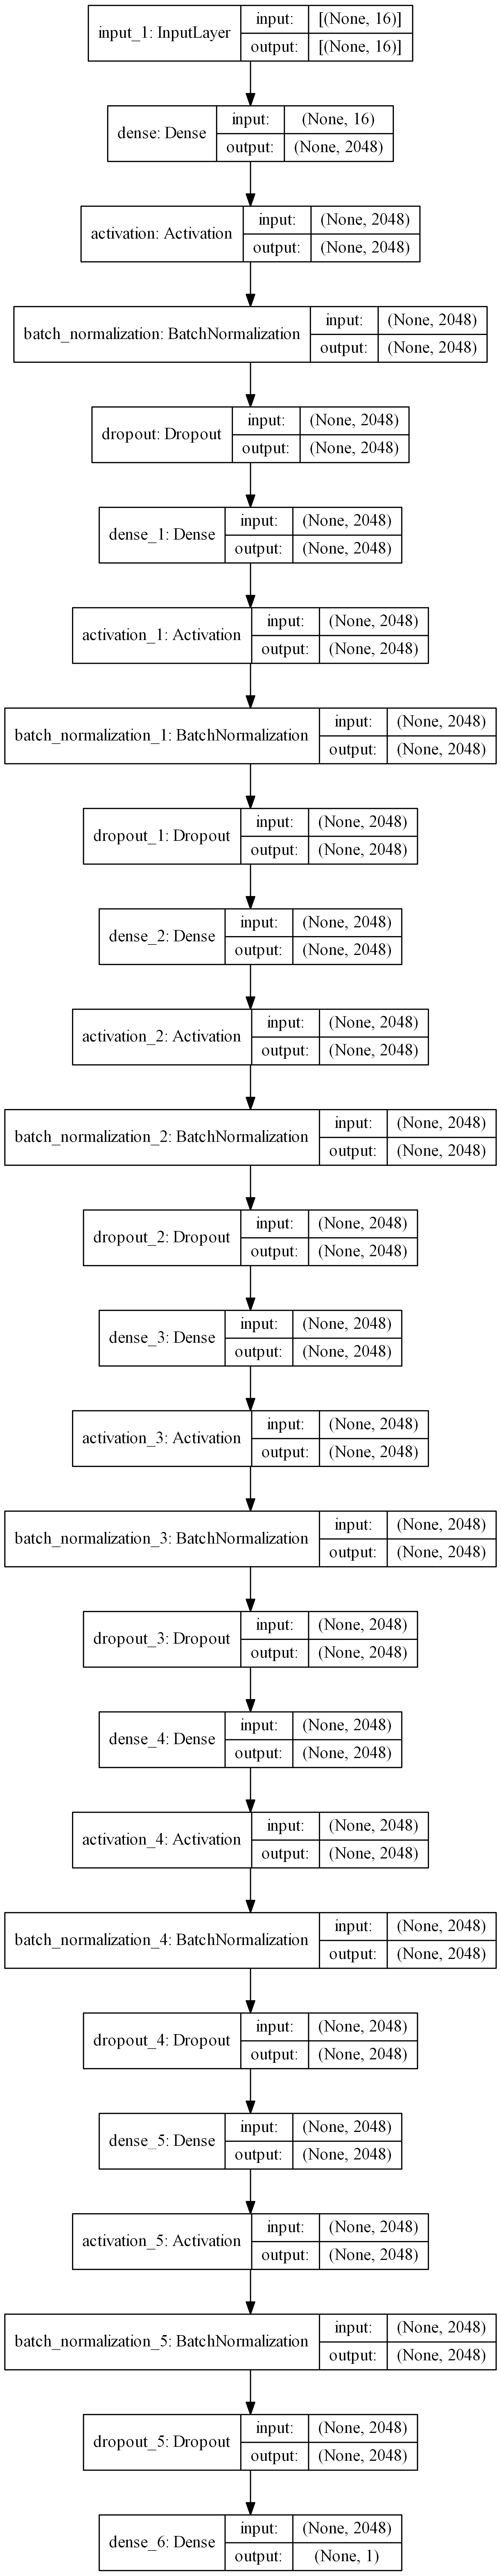


Model Summaries:
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              34816     
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
activation_1 (Activation)    (None, 2048)  

None


SCORES:


loss  auc  binary_accuracy  precision   recall  f1_score
32  0.014542  1.0         0.998379   1.000000  0.99661  0.998302
33  0.011334  1.0         1.000000   1.000000  1.00000  1.000000
34  0.013045  1.0         0.998379   0.996622  1.00000  0.998308
35  0.010848  1.0         0.998379   1.000000  0.99661  0.998302
36  0.009995  1.0         1.000000   1.000000  1.00000  1.000000

val_loss   val_auc  val_binary_accuracy  val_precision  val_recall  \
32  0.655644  0.778726             0.719697       0.772152      0.7625   
33  0.672884  0.776202             0.727273       0.768293      0.7875   
34  0.691969  0.772356             0.734848       0.771084      0.8000   
35  0.711035  0.768750             0.734848       0.771084      0.8000   
36  0.731401  0.765986             0.734848       0.771084      0.8000   

    val_f1_score  
32      0.767296  
33      0.777778  
34      0.785276  
35      0.785276  
36      0.785276


History df saved to C:\Python\Python_Data_Science_Exercises\datasets\hdf_ks_bc_model.csv.feather

Minimum Validation Loss: 0.5281
Minimum Loss: 0.0100
Maximum Validation Accuracy: 80.3030
Maximum Accuracy: 100.0000
Maximum Validation F1-Score: 83.1169
Maximum F1-Score: 100.0000

CPU times: total: 2min 26s
Wall time: 49.1 s


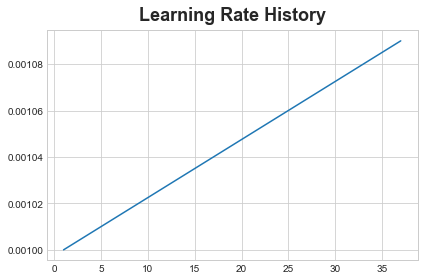

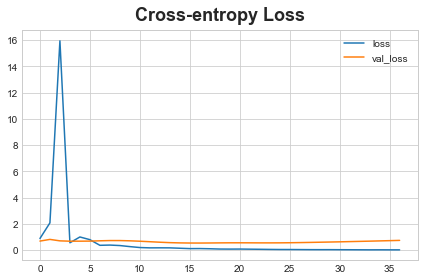

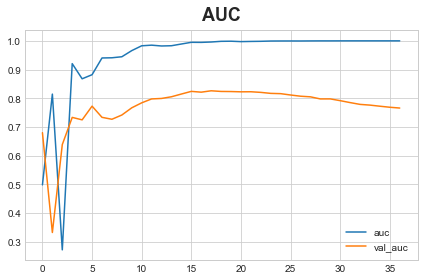

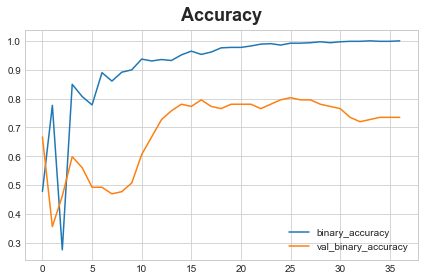

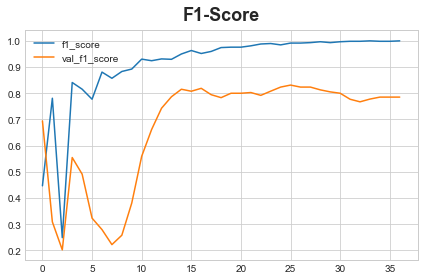

In [71]:
%%time
bc_dict = BinaryClassificationModel()

In [64]:
# Uncomment to load model in Tensorflow's "SavedModel" format
#load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
#bc_model = tf.keras.models.load_model(f'{workdir}ks_bc_model', options=load_locally) 
#model_weights = bc_model.get_weights()

In [65]:
model = bc_dict['ks_bc_model']
dl = bc_dict['dl_class']

<a id="test_unseen"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Test Binary Classification Model with Unseen Dataset</b>
</div>

In [72]:
PredictUnseen(model_name = 'Keras Binary Classification')

Please wait, preparing predictions
Unseen Test Data : Keras Binary Classification Score:
Accuracy for model: 81.95 %



<a id="uit"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Test Binary Classification Model with Single User Inputs</b>
</div>

In [148]:
UserInputTest()

#UserInputTestMultiple()


User Entry: 1


{'Term': 84,
 'NoEmp': 39,
 'NewExist': 1,
 'CreateJob': 0,
 'RetainedJob': 0,
 'FranchiseCode': 1,
 'UrbanRural': 1,
 'LowDoc': 0,
 'DisbursementGross': 81039,
 'SBA_Appv': 25000,
 'Industry': 33,
 'Recession': 0,
 'RealEstate': 0,
 'SBA_Portion': 50,
 'State_hash': 181805,
 'CityState_hash': 203332}

Prediction: 1
Prediction: Approve The Loan


User Entry: 2


{'Term': 24,
 'NoEmp': 4,
 'NewExist': 1,
 'CreateJob': 0,
 'RetainedJob': 0,
 'FranchiseCode': 1,
 'UrbanRural': 1,
 'LowDoc': 0,
 'DisbursementGross': 50000,
 'SBA_Appv': 25000,
 'Industry': 42,
 'Recession': 0,
 'RealEstate': 0,
 'SBA_Portion': 50,
 'State_hash': 321147,
 'CityState_hash': 699085}

Prediction: 0
Prediction: Do Not Approve The Loan



{'pred1': 1, 'pred2': 0}

In [ ]:
# uncomment if needed
#del bc_dict, model, dl
#gc.collect()

<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="binary_classification_wide_and_deep"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>1.2 Binary Classification Wide and Deep tf.keras model</h2>
</div>

<div class="alert alert-block alert-info">
A <b>Wide and Deep</b> network trains a linear layer side-by-side with a deep stack of dense layers. Wide and Deep networks are often effective on tabular datasets.

Here we use the <b>keras.experimental.WideDeepModel</b> algorithm.  However, in comparison to the previous 1.1 Binary Classification tf.keras model, which is "wide" in having an increased capacity with more units to existing layers, and "deep" with more layers, the resulting scores are more or less similar.
</div>

In [74]:
'''
The parameter best_trial and tuner is set to None by default.
tuner:
   op : Optuna
   kt : Keras Tuner
When Optuna or Keras Tuner is run, they will output a best_trial dictionary. This dictionary 
will then be passed to WideAndDeepModel() to test the Optuna best_trial hyperparameter set.
'''
def WideAndDeepModel(tuner_type = None, best_trial = None):
    tf.keras.backend.clear_session()
    X = pd.read_feather(final_ds)
    #X = X.head(500)      # uncomment for testing
    y = X.pop('MIS_Status')

    # initiate the custom class, this includes initializing most parameters/variables
    dl = KerasBinaryClassification(X,y)
    dl.osample()
    dl.split_data()
    dl.Scale_Data_Yeo_Johnson()
    
    dl.X, dl.y = None, None
    del X, y
    gc.collect()

    dl.input_shape = [dl.X_train.shape[1]]
    print()
    print(f'X_train shape: {dl.X_train.shape}')
    print("Input shape: {}".format(dl.input_shape))  
 
    '''Initialize the number of EPOCHS and early stopping value'''
    dl.EPOCHS = 200
    dl.EARLY_STOPPING_ROUNDS = dl.EPOCHS * 0.1   # 10%
      
    dl.n_layers = 6

    # if WideAndDeepModel() is called when runing Optuna or Keras Tuner
    if tuner_type != None:
        print('{}{} best_trial parameters have been set for a WideAndDeep model{}'.format(
                    mf.color.bdblue,
                    tuner_type,
                    mf.color.end
                    )
             )
        dl.n_layers = best_trial['n_layers']
        dl.UNITS = best_trial['units']
        dl.ACTIVATION = best_trial['activation']
        dl.DROPOUT = best_trial['dropout_rate']
        if 'learning_rate' in best_trial:
            dl.kt_run = True   # if True, no learning_rate schedule callback in fit()
            dl.learning_rate = best_trial['learning_rate']
            lr = dl.learning_rate
        else:
            lr = 'Not Included'
            
        param_info =\
            "{}Layers: {} | Units: {} | ACTIVATION: {} | DROPOUT: {} | LR: {}{}".format(
                    mf.color.bdgreen,
                    dl.n_layers,
                    dl.UNITS,
                    dl.ACTIVATION,
                    dl.DROPOUT,
                    lr,
                    mf.color.end
                    )
    else:
        print(f'{mf.color.bdblue}Parameters In Use{mf.color.end}')
        param_info = "{}Layers: {} | Units: {} | ACTIVATION: {} | DROPOUT: {}{}".format(
            mf.color.bdgreen,
            dl.n_layers,
            dl.UNITS,
            dl.ACTIVATION,
            dl.DROPOUT,
            mf.color.end
            )
    
    print(param_info)
    
    dl.create_wide_and_deep_model()
    
    print()
    
    history = dl.FitModel()   # fit the model
        
    # Save in Tensorflow's "SavedModel" format
    save_locally = tf.saved_model.SaveOptions(experimental_io_device = '/job:localhost')

    dl.wide.save(f'{workdir}ks_wide_model', options = save_locally)
    dl.deep.save(f'{workdir}ks_deep_model', options = save_locally)
    dl.wide_and_deep.save(f'{workdir}ks_wide_and_deep_model', options = save_locally)

    # Zip model directory.  
    #Only doing this to be able to easily download from Kaggle working dir.
    mf.ZipDir(f'{workdir}ks_wide_model')
    mf.ZipDir(f'{workdir}ks_deep_model')
    mf.ZipDir(f'{workdir}ks_wide_and_deep_model')
    
    print()
    print(f'{mf.color.bdblue}Models have been saved to directory {workdir}{mf.color.end}')
  
    # Plot model structures
    print()
    print(f'{mf.color.bdblue}Model structure{mf.color.end}')
    print(f'{mf.color.bdgreen}Wide model{mf.color.end}')
    display(tf.keras.utils.plot_model(dl.wide,\
                              f'{workdir}ks_wide_model.png',show_shapes=True, dpi=300))
    print(f'{mf.color.bdgreen}Deep model{mf.color.end}')
    display(tf.keras.utils.plot_model(dl.deep,\
                              f'{workdir}ks_deep_model.png',show_shapes=True, dpi=300))
    print(f'{mf.color.bdgreen}Wide and Deep model{mf.color.end}')
    display(tf.keras.utils.plot_model(dl.wide_and_deep,\
                              f'{workdir}ks_wide_and_deep_model.png',show_shapes=True, dpi=300))
    
    print()
    print(f'{mf.color.bdblue}Model Summaries:{mf.color.end}')
    display(dl.wide_and_deep.summary())
    print()
    display(dl.wide.summary())
    print()
    display(dl.deep.summary())
    print()

    # Save and Plot history
    hdf = pd.DataFrame(history.history)
    if tuner_type == None:
        hdf_savename = 'hdf_ks_wd_model.csv.feather'
    else:
        if tuner_type == 'op':
            hdf_savename = 'hdf_optuna_ks_wd_model.csv.feather'
        else:
            hdf_savename = 'hdf_keras_tuner_ks_wd_model.csv.feather'

    hdf = dl.SavePlotHistory(hdf, hdf_savename)

    # initialize return value
    wd_dict = { 'ks_wide_and_deep_model':dl.wide_and_deep,
                'ks_deep_model':dl.deep,
                'ks_wide_model':dl.wide,
                'ks_history':hdf,
                'dl_class':dl}
    return wd_dict

print('WideAndDeepModel defined')

WideAndDeepModel defined


X size :  500
y size :  500
y Before Oversampling -> 1 : 441, 0 : 59
y After Oversampling  -> 1 : 441, 0 : 441

X_train shape: (617, 16)
Input shape: [16]
Parameters In Use
Layers: 6 | Units: 2048 | ACTIVATION: swish | DROPOUT: 0.1

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 0.8538 - auc: 0.5308 - binary_accuracy: 0.5348 - precision: 0.5132 - recall: 0.5288 - val_loss: 0.6772 - val_auc: 0.7173 - val_binary_accuracy: 0.6212 - val_precision: 0.8000 - val_recall: 0.5000
Epoch 2/200
1/1 [==============================] - 1s 663ms/step - loss: 1.8478 - auc: 0.8158 - binary_accuracy: 0.7828 - precision: 0.7692 - recall: 0.7797 - val_loss: 0.7728 - val_auc: 0.3773 - val_binary_accuracy: 0.3409 - val_precision: 0.4340 - val_recall: 0.2875
Epoch 3/200
1/1 [==============================] - 1s 822ms/step - loss: 15.2802 - auc: 0.2815 - binary_accuracy: 0.2917 - precision: 0.2767 - recall: 0.2983 - val_loss: 0.6673 - val_auc: 0.7209 - val_binary_accuracy: 0.6288 - val_p

1/1 [==============================] - 1s 681ms/step - loss: 0.0361 - auc: 0.9995 - binary_accuracy: 0.9919 - precision: 0.9966 - recall: 0.9864 - val_loss: 0.6339 - val_auc: 0.8168 - val_binary_accuracy: 0.6818 - val_precision: 0.6667 - val_recall: 0.9500
Epoch 31/200
1/1 [==============================] - 1s 710ms/step - loss: 0.0317 - auc: 0.9997 - binary_accuracy: 0.9935 - precision: 1.0000 - recall: 0.9864 - val_loss: 0.6587 - val_auc: 0.8136 - val_binary_accuracy: 0.6742 - val_precision: 0.6609 - val_recall: 0.9500
Epoch 32/200
1/1 [==============================] - 1s 766ms/step - loss: 0.0244 - auc: 1.0000 - binary_accuracy: 0.9968 - precision: 1.0000 - recall: 0.9932 - val_loss: 0.6862 - val_auc: 0.8078 - val_binary_accuracy: 0.6742 - val_precision: 0.6609 - val_recall: 0.9500
Epoch 33/200
1/1 [==============================] - 1s 661ms/step - loss: 0.0236 - auc: 1.0000 - binary_accuracy: 0.9968 - precision: 1.0000 - recall: 0.9932 - val_loss: 0.7164 - val_auc: 0.8037 - val_bi

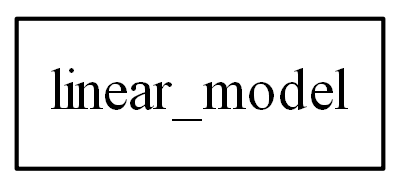

Deep model


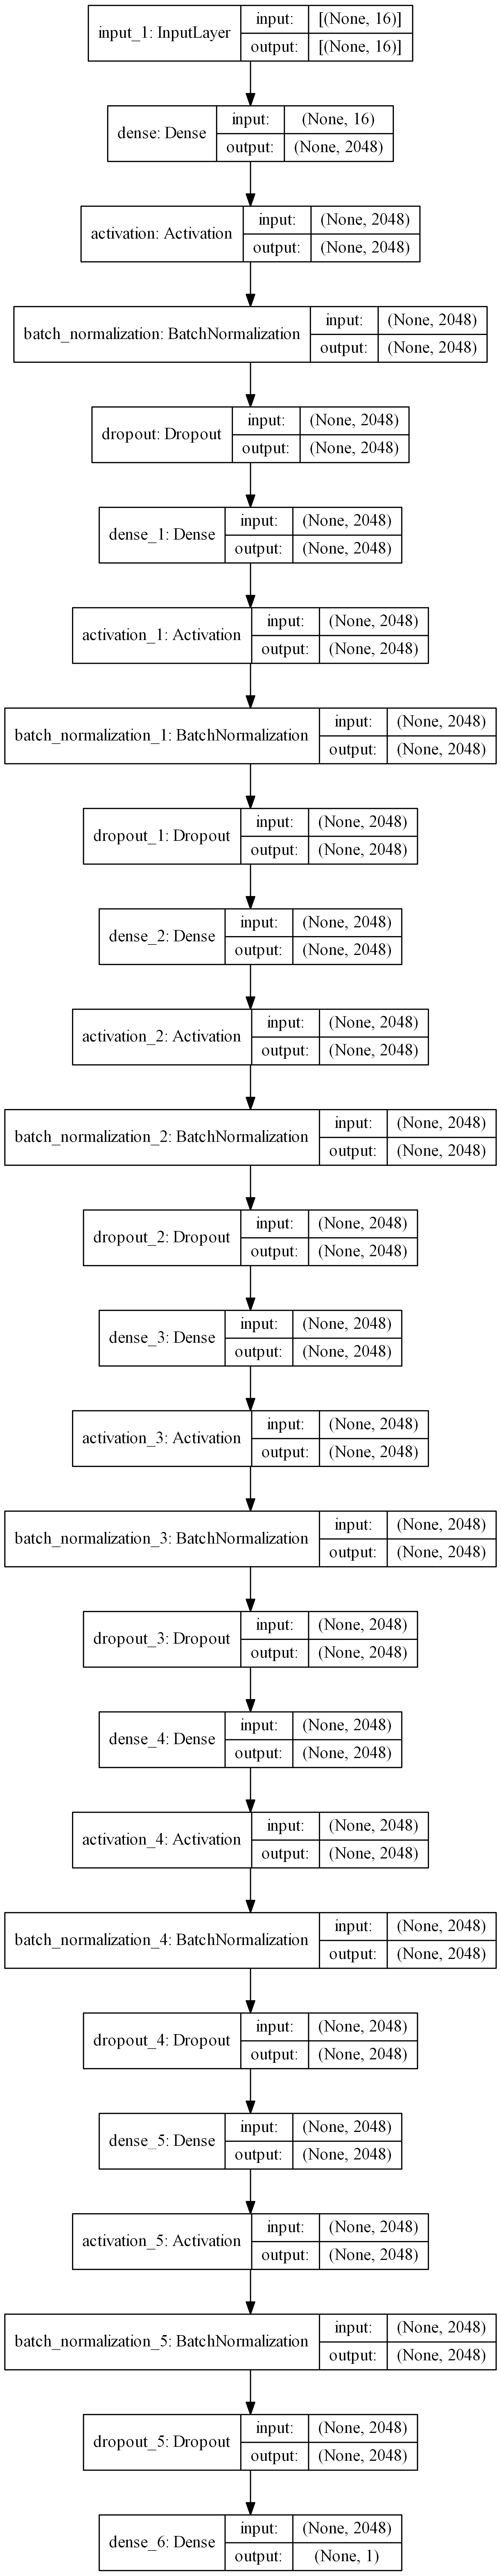

Wide and Deep model


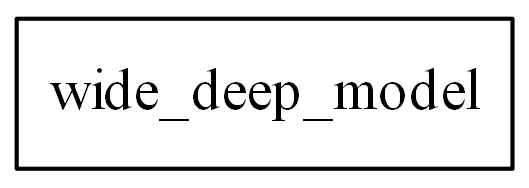


Model Summaries:
Model: "wide_deep_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
linear_model (LinearModel)   multiple                  17        
_________________________________________________________________
model (Functional)           (None, 1)                 21067777  
Total params: 21,067,794
Trainable params: 21,043,218
Non-trainable params: 24,576
_________________________________________________________________


None


Model: "linear_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  16        
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


None


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              34816     
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
activation_1 (Activation)    (None, 2048)              0    

None



SCORES:


loss  auc  binary_accuracy  precision   recall  f1_score
37  0.015575  1.0         0.995138        1.0  0.98983  0.994889
38  0.013019  1.0         0.996759        1.0  0.99322  0.996599
39  0.011305  1.0         1.000000        1.0  1.00000  1.000000
40  0.009060  1.0         1.000000        1.0  1.00000  1.000000
41  0.006953  1.0         1.000000        1.0  1.00000  1.000000

val_loss   val_auc  val_binary_accuracy  val_precision  val_recall  \
37  0.949490  0.798918             0.621212       0.617188      0.9875   
38  1.014714  0.802885             0.613636       0.612403      0.9875   
39  1.084301  0.804087             0.606061       0.606061      1.0000   
40  1.152696  0.798197             0.606061       0.606061      1.0000   
41  1.218856  0.796034             0.606061       0.606061      1.0000   

    val_f1_score  
37      0.759615  
38      0.755981  
39      0.754717  
40      0.754717  
41      0.754717


History df saved to C:\Python\Python_Data_Science_Exercises\datasets\hdf_ks_wd_model.csv.feather

Minimum Validation Loss: 0.5168
Minimum Loss: 0.0070
Maximum Validation Accuracy: 80.3030
Maximum Accuracy: 100.0000
Maximum Validation F1-Score: 84.1463
Maximum F1-Score: 100.0000

CPU times: total: 3min 26s
Wall time: 59 s


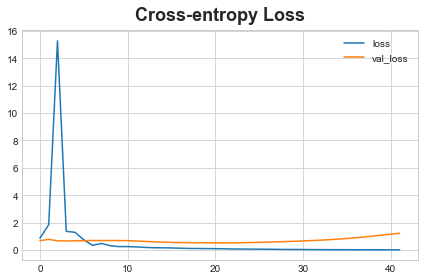

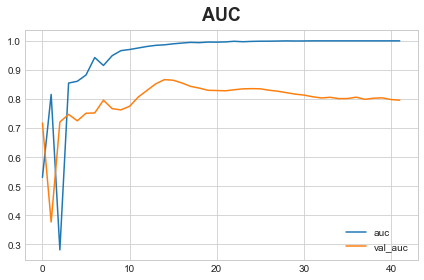

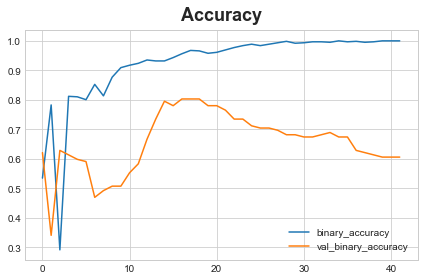

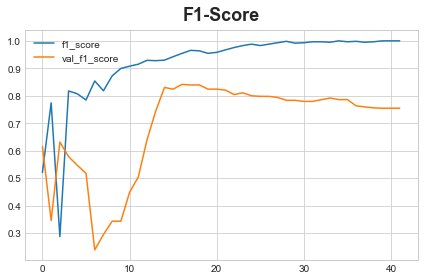

In [75]:
%%time
wd_dict = WideAndDeepModel()

In [76]:
model = wd_dict['ks_wide_and_deep_model']
dl = wd_dict['dl_class']

In [77]:
display(model.metrics_names)
display(model.loss)
display(model.name)

['loss', 'auc', 'binary_accuracy', 'precision', 'recall']

'binary_crossentropy'

'wide_deep_model'

<a id="test_unseen_wd"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Test keras.experimental.WideDeepModel with Unseen Dataset</b>
</div>

In [78]:
PredictUnseen(model_name = 'keras.experimental.WideDeepModel')

Please wait, preparing predictions
Unseen Test Data : keras.experimental.WideDeepModel Score:
Accuracy for model: 69.92 %



<a id="uit_wd"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Test keras.experimental.WideDeepModel with Single User Inputs</b>
</div>

In [79]:
UserInputTest()

UserInputTestMultiple()


User Entry: 1


{'Term': 84,
 'NoEmp': 39,
 'NewExist': 1,
 'CreateJob': 0,
 'RetainedJob': 0,
 'FranchiseCode': 1,
 'UrbanRural': 1,
 'LowDoc': 0,
 'DisbursementGross': 81039,
 'SBA_Appv': 25000,
 'Industry': 33,
 'Recession': 0,
 'RealEstate': 0,
 'SBA_Portion': 50,
 'State_hash': 181805,
 'CityState_hash': 203332}

Prediction: 1
Prediction: Approve The Loan


User Entry: 2


{'Term': 24,
 'NoEmp': 4,
 'NewExist': 1,
 'CreateJob': 0,
 'RetainedJob': 0,
 'FranchiseCode': 1,
 'UrbanRural': 1,
 'LowDoc': 0,
 'DisbursementGross': 50000,
 'SBA_Appv': 25000,
 'Industry': 42,
 'Recession': 0,
 'RealEstate': 0,
 'SBA_Portion': 50,
 'State_hash': 321147,
 'CityState_hash': 699085}

Prediction: 1
Prediction: Approve The Loan



In [80]:
# uncomment if needed
#del wd_dict, model, dl
#gc.collect()

<a id="compare_bc_wd"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>1.3 Score Comparison : Binary Classification vs WideAndDeep Models</h2>
</div>

In [83]:
def CompareModels():
    hdf1 = pd.read_feather(f'{workdir}hdf_ks_bc_model.csv.feather')
    hdf2 = pd.read_feather(f'{workdir}hdf_ks_wd_model.csv.feather')
    
    crc = CompareResults()  # instantiate custom class

    crc.BuildCompare(hdf1, hdf2,
                 'Binary Classification',     # column 1 name
                 'WideAndDeep',               # column 2 name
                 'Binary Classification vs WideAndDeep Scores'      # title
                )
    
CompareModels()

Binary Classification vs WideAndDeep Scores


Binary Classification  WideAndDeep
Validation Loss                          0.528129     0.516801
Validation Binary Accuracy              80.303031    80.303031
Validation F1-Score                     83.116885    84.146343
Loss                                     0.009995     0.006953
Binary Accuracy                        100.000000   100.000000
F1-Score                               100.000000   100.000000

Binary Accuracy Improvement:
Improved by 0.0 percentage points


<div class="alert alert-block alert-info">
The scores between using the simulated wide and deep Binary Classification model versus the keras.experimental.WideDeepModel model are <b>very similar</b>.
</div>

<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="part2"></a>
<div style="font-family: Trebuchet MS;background-color:DarkRed;color:AliceBlue;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
<h1 id="part2" style='color:GhostWhite;'>Part 2. Optuna Hyperparameter Tuning
</div>

<a id="optuna_study"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.1 Optuna Study</h2>
</div>

In [110]:
#from optuna.integration import KerasPruningCallback
# For running Optuna tuning on full dataset.
def OptunaStudyKeras():
    tf.keras.backend.clear_session()
    X = pd.read_feather(final_ds)
    #X = X.head(500)      # uncomment for testing
    y = X.pop('MIS_Status')

    features_num = list(X)
    print(features_num)
    
    # initiate the custom class
    dl = optuna_tuning(X,y)
    dl.osample()
    dl.split_data()
    dl.Scale_Data_Yeo_Johnson()
 
    dl.X, dl.y = None, None
    del X, y
    gc.collect()

    dl.input_shape = [dl.X_train.shape[1]]
    print()
    print("Input shape: {}".format(dl.input_shape))  

    if os.path.exists(f'{workdir}ks_optuna_study_log.txt'):
        os.remove(f'{workdir}ks_optuna_study_log.txt')
    
    #*********************************************************
    # Initialize number of trials and epochs
    dl.nn_trials = None         
    dl.nn_timeout = 60 * 240    # 4 hours  
    dl.EPOCHS = 200
    #dl.nn_timeout = 120         # uncomment for testing
    #dl.EPOCHS = 2               # uncomment for testing
    dl.EARLY_STOPPING_ROUNDS = dl.EPOCHS * 0.1   # 10%
    #*********************************************************
    
    # STUDY
    
    # Turn off optuna log notes, to use own logging notes
    #optuna.logging.set_verbosity(optuna.logging.WARN)
    optuna.logging.set_verbosity(optuna.logging.INFO)

    print(f"{mf.color.bold}Please wait, finding best trial ...{mf.color.end}")         
    dl.gt = dt.datetime.now()   # to show total runtime later
    
    study = optuna.create_study(direction="maximize")
    try:
        # callbacks [self.save_study] is to save study in case memory fails
        study.optimize(dl.objective_keras,
                        n_trials = dl.nn_trials,
                        timeout = dl.nn_timeout,
                        callbacks = [dl.logging_callback, dl.save_study],
                        gc_after_trial = True,
                        catch = (RuntimeWarning,ArithmeticError,))
    except MemoryError as e:
        print(f'{mf.color.bdblue}{e} : Memory was getting low, Trial ended early{mf.color.end}')
        
    complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]
    pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
    print()
    print(f'Number of finished trials: {len(study.trials)}')
    print(f'Number of pruned trials: {len(pruned_trials)}')
    print(f'Number of completed trials: {mf.color.bdgreen}{len(complete_trials)}{mf.color.end}')
    print(f'{mf.color.bdblue}Best trial: {study.best_trial.params}{mf.color.end}')
    
    joblib.dump(study, f"{workdir}ks_optuna_study.pkl")   # save study

    print()
    return {'study':study}

print('OptunaStudyKeras() has been defined')

OptunaStudyKeras() has been defined


In [111]:
%%time
if optuna_flag == 1:
    study_results = OptunaStudyKeras()


Time Started = 01:19:04 AM
Optuna Trials will end around: 01:21:04 AM

TimeOut: 120 | Epochs: 2 | Early Stopping Rounds: 0.2

Trial 15 done with best value: 68.93939393939394 and parameters: {'n_layers': 6, 'units': 2048, 'activation': 'swish', 'dropout_rate': 0.5}. 

Current Trial: Layers: 10 | Units: 2048 | ACTIVATION: swish | DROPOUT: 0.5

Current Ram Used: 86.2 %
Total Elapsed Time from Training Start: Runtime : 0:01:55.401372

Running Trial 19

Epoch 1/2
1/1 [==============================] - 5s 5s/step - loss: 1.0444 - auc: 0.5003 - binary_accuracy: 0.5041 - precision: 0.4816 - recall: 0.4881 - val_loss: 0.6961 - val_auc: 0.5702 - val_binary_accuracy: 0.3939 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 1s 1s/step - loss: 0.9910 - auc: 0.5628 - binary_accuracy: 0.5511 - precision: 0.5302 - recall: 0.5356 - val_loss: 0.6996 - val_auc: 0.6596 - val_binary_accuracy: 0.3939 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
R

[I 2022-06-01 01:21:07,664] Trial 19 pruned. 



Number of finished trials: 20
Number of pruned trials: 10
Number of completed trials: 10
Best trial: {'n_layers': 6, 'units': 2048, 'activation': 'swish', 'dropout_rate': 0.5}

CPU times: total: 4min 13s
Wall time: 2min 3s


<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="optuna_metrics"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.2 Optuna Study Metrics</h2>
</div>

In [86]:
# View the trials log; Very useful to know which parameters one can avoid
with open(f"{workdir}ks_optuna_study_log.txt", "r+") as os_log:
    print(os_log.read())



Current Ram Used: 76.2 %
Trial 0 finished with parameters: {'n_layers': 8, 'units': 2048, 'activation': 'relu', 'dropout_rate': 0.1}. 

Current Ram Used: 76.2 %
Trial 0 done with best value: 40.909090909090914 and parameters: {'n_layers': 8, 'units': 2048, 'activation': 'relu', 'dropout_rate': 0.1}. 

Current Ram Used: 77.0 %
Trial 1 finished with parameters: {'n_layers': 8, 'units': 1024, 'activation': 'swish', 'dropout_rate': 0.1}. 

Current Ram Used: 78.1 %
Trial 2 finished with parameters: {'n_layers': 10, 'units': 2048, 'activation': 'swish', 'dropout_rate': 0.1}. 

Current Ram Used: 77.9 %
Trial 2 done with best value: 62.878787878787875 and parameters: {'n_layers': 10, 'units': 2048, 'activation': 'swish', 'dropout_rate': 0.1}. 

Current Ram Used: 79.8 %
Trial 3 finished with parameters: {'n_layers': 10, 'units': 2048, 'activation': 'swish', 'dropout_rate': 0.5}. 

Current Ram Used: 79.9 %
Trial 4 finished with parameters: {'n_layers': 10, 'units': 2048, 'activation': 'swish',

In [87]:
# uncomment below if you want to load saved study to check, if desired
jl = joblib.load(f"{workdir}ks_optuna_study.pkl")
jl = jl.best_trial.params
display(jl)

{'n_layers': 6, 'units': 1024, 'activation': 'swish', 'dropout_rate': 0.3}

In [88]:
# one can get the best trial by loading the saved study
study = joblib.load(f"{workdir}ks_optuna_study.pkl")
best_trial = study.best_trial.params
display(best_trial)

{'n_layers': 6, 'units': 1024, 'activation': 'swish', 'dropout_rate': 0.3}

In [89]:
# here, we just use the study returned by OptunaStudyKeras() previously
best_trial = study_results['study'].best_trial.params
best_trial

{'n_layers': 6, 'units': 1024, 'activation': 'swish', 'dropout_rate': 0.3}

In [90]:
# Trial results dataframe sorted from best value (RMSE) ascending
def ViewResultsAsDf():
    stdf = study_results['study'].trials_dataframe()
    stdf = stdf.sort_values('value',ascending=True)

    return stdf.head(2)    # return here is only used for printing output

ViewResultsAsDf()

number      value             datetime_start          datetime_complete  \
1       1  39.393939 2022-06-01 01:11:18.652067 2022-06-01 01:11:24.124003   
7       7  39.393939 2022-06-01 01:11:58.556876 2022-06-01 01:12:03.665197   

                duration params_activation  params_dropout_rate  \
1 0 days 00:00:05.471936             swish                  0.1   
7 0 days 00:00:05.108321              relu                  0.1   

   params_n_layers  params_units     state  
1                8          1024  COMPLETE  
7               10          1024    PRUNED

In [91]:
#Visualize parameter importance
optuna.visualization.plot_param_importances(study)

<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="try_best_hp"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.3 Test Optuna Best Trial Hyperparameters</h2>
</div>

X size :  500
y size :  500
y Before Oversampling -> 1 : 441, 0 : 59
y After Oversampling  -> 1 : 441, 0 : 441

X_train shape: (617, 16)
Input shape: [16]
op best_trial parameters have been set for a WideAndDeep model
Layers: 6 | Units: 1024 | ACTIVATION: swish | DROPOUT: 0.3 | LR: Not Included

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.9879 - auc: 0.4896 - binary_accuracy: 0.5041 - precision: 0.4834 - recall: 0.5424 - val_loss: 0.6892 - val_auc: 0.7456 - val_binary_accuracy: 0.4318 - val_precision: 0.6923 - val_recall: 0.1125
Epoch 2/200
1/1 [==============================] - 0s 376ms/step - loss: 0.7372 - auc: 0.7990 - binary_accuracy: 0.7245 - precision: 0.7076 - recall: 0.7220 - val_loss: 0.6975 - val_auc: 0.7800 - val_binary_accuracy: 0.3939 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 244ms/step - loss: 0.6123 - auc: 0.8102 - binary_accuracy: 0.7455 - precision: 0.7300 - recall: 0.7424 - v

1/1 [==============================] - 0s 219ms/step - loss: 0.0550 - auc: 0.9985 - binary_accuracy: 0.9789 - precision: 0.9930 - recall: 0.9627 - val_loss: 0.5081 - val_auc: 0.8466 - val_binary_accuracy: 0.7879 - val_precision: 0.8023 - val_recall: 0.8625
Epoch 31/200
1/1 [==============================] - 0s 327ms/step - loss: 0.0703 - auc: 0.9972 - binary_accuracy: 0.9708 - precision: 0.9695 - recall: 0.9695 - val_loss: 0.5030 - val_auc: 0.8442 - val_binary_accuracy: 0.7955 - val_precision: 0.8046 - val_recall: 0.8750
Epoch 32/200
1/1 [==============================] - 0s 246ms/step - loss: 0.0533 - auc: 0.9983 - binary_accuracy: 0.9757 - precision: 0.9762 - recall: 0.9729 - val_loss: 0.4992 - val_auc: 0.8382 - val_binary_accuracy: 0.8106 - val_precision: 0.8235 - val_recall: 0.8750
Epoch 33/200
1/1 [==============================] - 0s 218ms/step - loss: 0.0574 - auc: 0.9981 - binary_accuracy: 0.9789 - precision: 0.9764 - recall: 0.9797 - val_loss: 0.4983 - val_auc: 0.8334 - val_bi

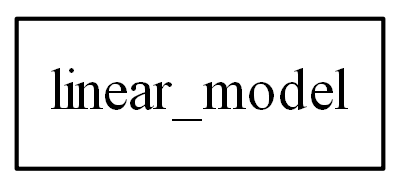

Deep model


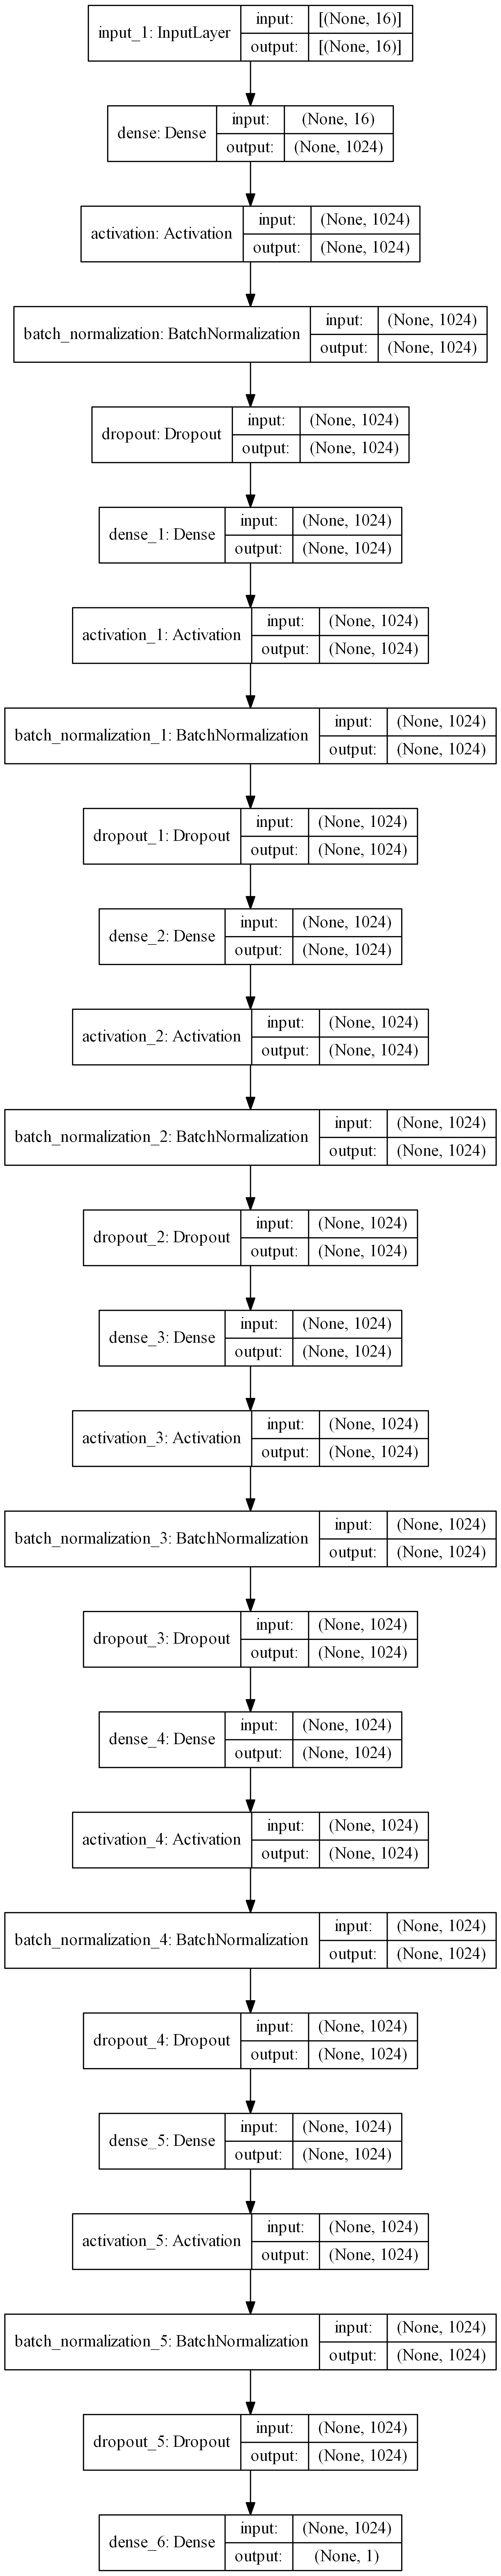

Wide and Deep model


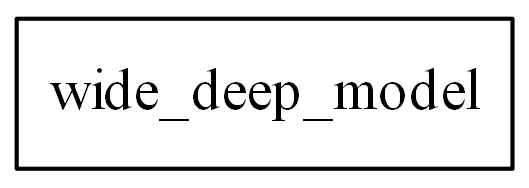


Model Summaries:
Model: "wide_deep_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
linear_model (LinearModel)   multiple                  17        
_________________________________________________________________
model (Functional)           (None, 1)                 5291009   
Total params: 5,291,026
Trainable params: 5,278,738
Non-trainable params: 12,288
_________________________________________________________________


None


Model: "linear_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  16        
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


None


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              17408     
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0    

None



SCORES:


loss       auc  binary_accuracy  precision    recall  f1_score
49  0.030864  0.999484         0.988655   0.993151  0.983051  0.988075
50  0.020066  0.999842         0.991896   0.996575  0.986441  0.991482
51  0.016472  0.999884         0.991896   0.993197  0.989830  0.991511
52  0.013502  0.999910         0.996759   0.996610  0.996610  0.996610
53  0.031738  0.999432         0.988655   0.993151  0.983051  0.988075

val_loss   val_auc  val_binary_accuracy  val_precision  val_recall  \
49  0.642504  0.825361             0.757576       0.722222      0.9750   
50  0.629833  0.823918             0.750000       0.719626      0.9625   
51  0.629593  0.823918             0.757576       0.726415      0.9625   
52  0.637484  0.826082             0.757576       0.726415      0.9625   
53  0.657723  0.826563             0.750000       0.711712      0.9875   

    val_f1_score  
49      0.829787  
50      0.823529  
51      0.827957  
52      0.827957  
53      0.827225


History df saved to C:\Python\Python_Data_Science_Exercises\datasets\hdf_optuna_ks_wd_model.csv.feather

Minimum Validation Loss: 0.4978
Minimum Loss: 0.0135
Maximum Validation Accuracy: 81.0606
Maximum Accuracy: 99.6759
Maximum Validation F1-Score: 84.8485
Maximum F1-Score: 99.6610

CPU times: total: 1min 32s
Wall time: 32.4 s


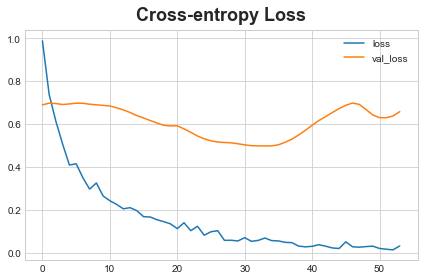

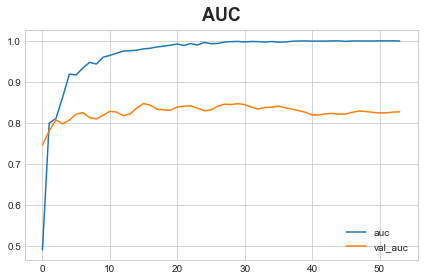

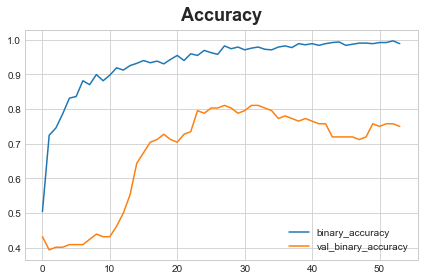

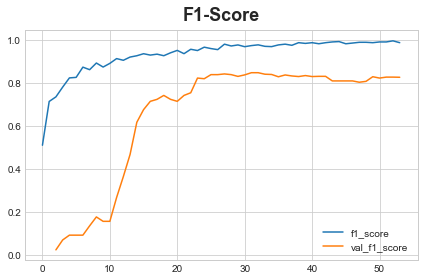

In [92]:
%%time

wd_dict = WideAndDeepModel(tuner_type = 'op', best_trial = best_trial)

<a id="optuna_comparison"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.4 Optuna Tuning Comparison</h2>
</div>

<div class="alert alert-block alert-info">
    <b>Compare metrics before and after Optuna tuning.</b><br><br>
    Comparison is made between the WideAndDeep model results before and after Optuna tuning.
  </div>

In [93]:
def CompareOptuna():
    hdf1 = pd.read_feather(f'{workdir}hdf_ks_wd_model.csv.feather')
    hdf2 = pd.read_feather(f'{workdir}hdf_optuna_ks_wd_model.csv.feather')
    
    crc = CompareResults()  # instantiate custom class

    crc.BuildCompare(hdf1, hdf2,
                 'Before Optuna',     # column 1 name
                 'After Optuna',      # column 2 name
                 'Binary Accuracy Improvement Using Optuna Suggested Parameters:'   # title
                )
    
CompareOptuna()

Binary Accuracy Improvement Using Optuna Suggested Parameters:


Before Optuna  After Optuna
Validation Loss                  0.516801      0.497830
Validation Binary Accuracy      80.303031     81.060606
Validation F1-Score             84.146343     84.848485
Loss                             0.006953      0.013502
Binary Accuracy                100.000000     99.675852
F1-Score                       100.000000     99.661016

Binary Accuracy Improvement:
Improved by -0.32 percentage points


<div class="alert alert-block alert-warning">
    I used <b>4 hours of Optuna training time</b>, with TPU as accelerator, and could have had a better score, or not anymore, with a longer time which would mean more trial runs.  We could also repeat the run.  Anyway, this is just to demonstrate Optuna Tuning for Keras.<br><br>
Also, it seems that I already chose a good hyperparameter set to start with, before Optuna.
</div>

In [94]:
model = wd_dict['ks_wide_and_deep_model']
dl = wd_dict['dl_class']

<a id="optuna_test_unseen_wd"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Test Optuna-Tuned keras.experimental.WideDeepModel with Unseen Dataset</b>
</div>

In [95]:
PredictUnseen(model_name = 'Optuna-tuned keras.experimental.WideDeepModel')

Please wait, preparing predictions
Unseen Test Data : Optuna-tuned keras.experimental.WideDeepModel Score:
Accuracy for model: 75.19 %



<a id="optuna_uit"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Test Optuna-Tuned keras.experimental.WideDeepModel with Single User Inputs</b>
</div>

In [96]:
UserInputTest()

UserInputTestMultiple()


User Entry: 1


{'Term': 84,
 'NoEmp': 39,
 'NewExist': 1,
 'CreateJob': 0,
 'RetainedJob': 0,
 'FranchiseCode': 1,
 'UrbanRural': 1,
 'LowDoc': 0,
 'DisbursementGross': 81039,
 'SBA_Appv': 25000,
 'Industry': 33,
 'Recession': 0,
 'RealEstate': 0,
 'SBA_Portion': 50,
 'State_hash': 181805,
 'CityState_hash': 203332}

Prediction: 1
Prediction: Approve The Loan


User Entry: 2


{'Term': 24,
 'NoEmp': 4,
 'NewExist': 1,
 'CreateJob': 0,
 'RetainedJob': 0,
 'FranchiseCode': 1,
 'UrbanRural': 1,
 'LowDoc': 0,
 'DisbursementGross': 50000,
 'SBA_Appv': 25000,
 'Industry': 42,
 'Recession': 0,
 'RealEstate': 0,
 'SBA_Portion': 50,
 'State_hash': 321147,
 'CityState_hash': 699085}

Prediction: 1
Prediction: Approve The Loan



In [97]:
# uncomment if needed
#del best_trial, study_results, wd_dict, model, dl
#gc.collect()

In [98]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("Optuna run completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>

<a id="part3"></a>
<div style="font-family: Trebuchet MS;background-color:DarkRed;color:AliceBlue;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
<h1 id="part2" style='color:GhostWhite;'>Part 3. Keras Tuner Hyperparameter Tuning
    </div>

<div class="alert alert-block alert-warning">
I favor Optuna more than Keras Tuner, especially due to Optuna's speed.  Keras Tuner in comparison to Optuna is very slow, even with TPU.<br>
For example, with our dataset size and using TPU, each epoch run in Optuna takes about 4 seconds (the same time as when doing the usual model fit()), where each trial consists of 200 epochs, with early stopping of course.  In Keras Tuner, it takes about 200 seconds to run one epoch. Doing the math, one can only run two to three trials of 200 epochs each before the allocated weekly TPU usage of 20 hours is exhausted.<br><br>
    <b>IMHO, Keras Tuner can be considered if one has a very small dataset.</b><br><br>
Anyway, below is the code demonstration on how to use Keras Tuner, for reference only.  Here, we only use 2 trials of 2 epochs each.<br><br>
As at May 2022, Kaggle Tuner as is will fail in Kaggle, as it will be unable to save epoch checkpoints to Kaggle's working folder, it can only save to a Google Cloud Storage (gcs) location.  As a temporary solution, we mock/patch the Kaggle Tuner function that is responsible, and this solves the issue.  Kaggle Tuner must be version 1.1.2 and above.
</div>

<a id="kt_study"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.1 Keras Tuner Search</h2>
    Here we use the BayesianOptimization method, which is slower than Optuna.  We could also have used the faster Hyperband method (more like RandomSearch).   
</div>

<b>HyperBand</b><br>
"This technique tries to remove one of the problems in random search of hyperparameters. Problem is as follows: Random search may pick some values which are very obviously bad and will do full training and evaluation on it, which is wasteful. Hyperband provides one way to solve this problem. 

Hyperband Solution: Randomly sample all the combinations of hyperparameter and now instead of running full training and evaluation on it, train the model for few epochs (less than max_epochs) with these combinations and select the best candidates based on the results on these few epochs. It does this iteratively and finally runs full training and evaluation on the final chosen candidates. The number of iterations done depends on parameter ‘hyperband_iterations’ and number of epochs in each iteration are less than ‘max_epochs’."<br><br>
<b>Bayesian Optimization</b><br>
"This techniques addresses a common problem in RandomSearch and Hyperband. Problem: All the hyperparameter combinations are chosen randomly. Choosing hyperparameters randomly helps to explore the hyperparameter space but does not guarantee absolute optimal hyperparameters. 

Bayesian Ozptimization Solution: Instead of all combinations being random, it chooses first few randomly, then based on the performance on these hyperparameters it chooses the next best possible hyperparameters. <b>Hence it takes into account the history of the hyperparameters which were tried.</b> The iterations of choosing next set of hyperparameters based on history and evaluating performance continues till the tuner reaches optimal hyperparameters or exhausts maximum number of allowed trails."<br>
- <a href="https://medium.com/swlh/hyperparameter-tuning-in-keras-tensorflow-2-with-keras-tuner-randomsearch-hyperband-3e212647778f"><i>from Hyperparameter Tuning in Keras</i></a>

In [99]:
def KerasTuner(tuner_to_use = 'bo'):
    tf.keras.backend.clear_session()
    X = pd.read_feather(final_ds)
    #X = X.head(500)      # uncomment for testing
    y = X.pop('MIS_Status')
    
    # initiate the custom class
    dl = keras_tuning(X,y)
    dl.osample()
    dl.split_data()
    dl.Scale_Data_Yeo_Johnson()
 
    dl.X, dl.y = None, None
    del X, y
    gc.collect()

    dl.input_shape = [dl.X_train.shape[1]]
    print()
    print("Input shape: {}".format(dl.input_shape))  

    #***********************************************************
    # Initialize number of trials and epochs
    dl.EPOCHS = 2
    dl.EARLY_STOPPING_ROUNDS = dl.EPOCHS * 0.1   # 10%
    
    '''include learning_rate in tuning.  Personally,
    I prefer to use an lr_scheduler, but we include it here
    for demonstration purpose'''
    dl.include_lr = True
                     
    if tuner_to_use == 'bo':
        nn_trials = 2       # only for BayesianOptimization
        
    #************************************************************

    # TUNER SEARCH

    print(f"{mf.color.bold}Please wait, finding best trial ...{mf.color.end}")         
    
    if tuner_to_use == 'bo':
        # Instantiate the search
        # Here, we use BayesianOptimization.  The hypermodel function builds the model,
        # and calls the compile method as well as initialize the early_stopping callback
        tuner = kt.BayesianOptimization(
            dl.model_builder,                  # the hypermodel, found in custom class keras_tuning 
            objective = 'val_binary_accuracy', # objective to optimize
            #objective = kt.Objective("rmse", direction="min"),
            max_trials = nn_trials,            # number of trials
            distribution_strategy = tpu_strategy,
            # this project name (a dir) is created in 'directory', and is used to 
            #     resume tuning if the search is run again
            directory = f'{workdir}',   
            project_name = 'kbayesian',
            # if True, overwrite above directory if search is run again - i.e. don't resume
            overwrite = True
        )     
    else:    
        # Here, we use HyperBand
        tuner = kt.Hyperband(
            dl.model_builder,
            objective = 'val_binary_accuracy',
            max_epochs = dl.EPOCHS,
            factor = 30000000000,
            # One iteration will run approximately
            #     max_epochs * (math.log(max_epochs, factor) ** 2) 
            #     cumulative epochs across all trials
            hyperband_iterations = 1,    
            distribution_strategy = tpu_strategy,
            directory = f'{workdir}',         
            project_name = 'khyperband',
            overwrite = True
         ) 
        
    # hypertuning settings
    print()
    display(tuner.search_space_summary())
    
    #*****************************************************************************************
    '''
    When we run the keras-tuner search for hyperparameters with TPU accelerator in Kaggle, we 
    will get the error: 'UnimplementedError: File system scheme '[local]' not implemented', since
    keras-tuner does not have the option to save checkpoints to a local dir - i.e. the Kaggle 
    working directory.
    
    To fix this, we can use a gcs location under directory parameter, and that's it.
    
    However, if we still want to save to the Kaggle working directory, then we mock / patch the 
    keras-tuner function that saves checkpoints, using our own function temporarily to allow 
    saving locally.  
    
    First of all, Keras Tuner version must be 1.1.2 and above.
    
    Then, here we "replace" the function on_epoch_end() with new_on_epoch_end().
    This function is under keras_tuner.engine.tuner_utils.SaveBestEpoch class.
    
    We use "with patch()", which will temporarily replace the function with our code, and 
    revert it back automatically after use.
    '''
    #*****************************************************************************************
    def new_on_epoch_end(self, epoch, logs=None):
        if not self.objective.has_value(logs):
            # Save on every epoch if metric value is not in the logs. Either no
            # objective is specified, or objective is computed and returned
            # after `fit()`.
            
            '''we comment out the original code'''
            #self.model.save_weights(self.filepath)
             
            '''we put in our code'''
            # Save model in Tensorflow's "SavedModel" format
            save_locally = tf.saved_model.SaveOptions(experimental_io_device = '/job:localhost')
            self.model.save_weights(self.filepath, options = save_locally)

            return
        current_value = self.objective.get_value(logs)
        if self.objective.better_than(current_value, self.best_value):
            self.best_value = current_value
            
            '''we comment out the original code'''
            #self.model.save_weights(self.filepath)
            
            '''we put in our code'''
            # Save model in Tensorflow's "SavedModel" format
            save_locally = tf.saved_model.SaveOptions(experimental_io_device = '/job:localhost')
            self.model.save_weights(self.filepath, options = save_locally)    
    
    '''
    with patch() will now make tuner.search() use our patch, and automatically revert back
    to original after use
    '''
    with patch('keras_tuner.engine.tuner_utils.SaveBestEpoch.on_epoch_end', new_on_epoch_end):
        # Perform hypertuning.  The parameters are exactly like those in the fit() method.
        tuner.search(
            dl.X_train,
            dl.y_train,
            epochs=dl.EPOCHS,
            validation_data = (dl.X_valid, dl.y_valid), 
            callbacks=[dl.early_stopping]   # found at KerasBinaryClassification.PrepKSModel()
            )
        
    return {
            'tuner':tuner,
            'dl':dl,
           }

print('KerasTuner() defined')

KerasTuner() defined


In [100]:
%%time
if kt_flag == 1:
    '''
    bo = BayesianOptimization
    hb = Hyperband
    '''
    kt_retval = KerasTuner(tuner_to_use = 'bo')

Trial 2 Complete [00h 00m 16s]
val_binary_accuracy: 0.7045454382896423

Best val_binary_accuracy So Far: 0.75
Total elapsed time: 00h 00m 34s
INFO:tensorflow:Oracle triggered exit
CPU times: total: 1min 52s
Wall time: 35.1 s


<a id="kt_metrics"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.2 Keras Tuner Metrics</h2>
</div>

In [101]:
tuner = kt_retval['tuner']

In [102]:
tuner.results_summary(num_trials=10)

Results summary
Results in C:\Python\Python_Data_Science_Exercises\datasets\kbayesian
Showing 10 best trials
Trial summary
Hyperparameters:
n_layers: 8
units: 2048
activation: swish
dropout_rate: 0.3
learning_rate: 0.001
Score: 0.75
Trial summary
Hyperparameters:
n_layers: 6
units: 2048
activation: swish
dropout_rate: 0.1
learning_rate: 0.0001
Score: 0.7045454382896423


In [103]:
best_hp = tuner.get_best_hyperparameters()[0]
best_trial = best_hp.values
best_trial

{'n_layers': 8,
 'units': 2048,
 'activation': 'swish',
 'dropout_rate': 0.3,
 'learning_rate': 0.001}

<a id="kt_try_best_hp"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.3 Test Keras Tuner's Best Hyperparameters</h2>
</div>

X size :  500
y size :  500
y Before Oversampling -> 1 : 441, 0 : 59
y After Oversampling  -> 1 : 441, 0 : 441

X_train shape: (617, 16)
Input shape: [16]
kt best_trial parameters have been set for a WideAndDeep model
Layers: 8 | Units: 2048 | ACTIVATION: swish | DROPOUT: 0.3 | LR: 0.001

Epoch 1/200
1/1 [==============================] - 5s 5s/step - loss: 1.0283 - auc: 0.4701 - binary_accuracy: 0.4765 - precision: 0.4571 - recall: 0.5051 - val_loss: 0.6940 - val_auc: 0.7005 - val_binary_accuracy: 0.3939 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 1s 1s/step - loss: 1.1075 - auc: 0.7176 - binary_accuracy: 0.6645 - precision: 0.6384 - recall: 0.6881 - val_loss: 0.7433 - val_auc: 0.5270 - val_binary_accuracy: 0.3939 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 1s 1s/step - loss: 5.3219 - auc: 0.4217 - binary_accuracy: 0.4149 - precision: 0.3846 - recall: 0.3729 - val_lo

1/1 [==============================] - 1s 1s/step - loss: 0.0388 - auc: 0.9989 - binary_accuracy: 0.9870 - precision: 0.9864 - recall: 0.9864 - val_loss: 0.6486 - val_auc: 0.8425 - val_binary_accuracy: 0.7727 - val_precision: 0.8906 - val_recall: 0.7125
Epoch 31/200
1/1 [==============================] - 1s 1s/step - loss: 0.0559 - auc: 0.9964 - binary_accuracy: 0.9822 - precision: 0.9733 - recall: 0.9898 - val_loss: 0.6489 - val_auc: 0.8382 - val_binary_accuracy: 0.7576 - val_precision: 0.8636 - val_recall: 0.7125
Epoch 32/200
1/1 [==============================] - 1s 1s/step - loss: 0.0395 - auc: 0.9991 - binary_accuracy: 0.9822 - precision: 0.9765 - recall: 0.9864 - val_loss: 0.6511 - val_auc: 0.8406 - val_binary_accuracy: 0.7652 - val_precision: 0.8551 - val_recall: 0.7375
Epoch 33/200
1/1 [==============================] - 1s 1s/step - loss: 0.0366 - auc: 0.9992 - binary_accuracy: 0.9838 - precision: 0.9897 - recall: 0.9763 - val_loss: 0.6609 - val_auc: 0.8369 - val_binary_accurac

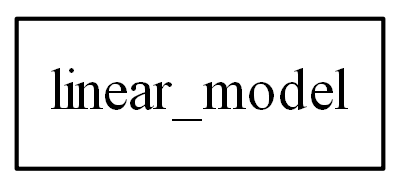

Deep model


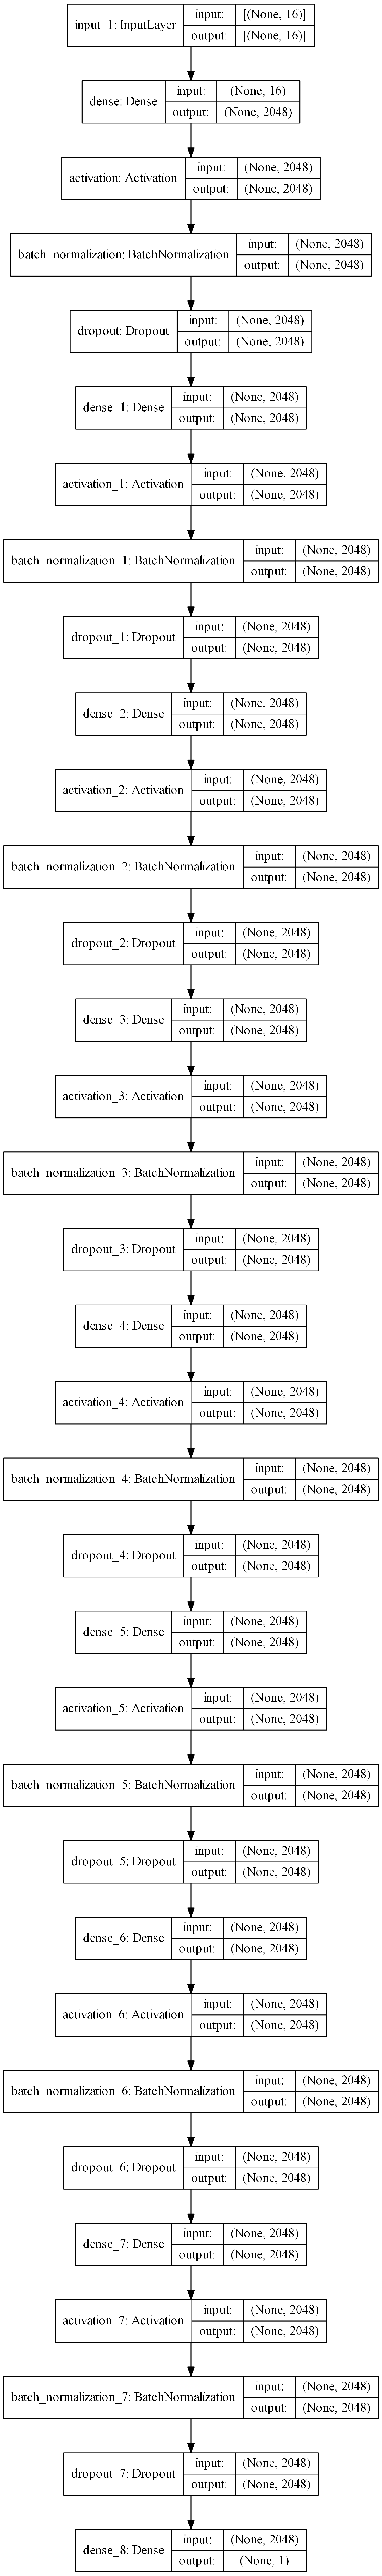

Wide and Deep model


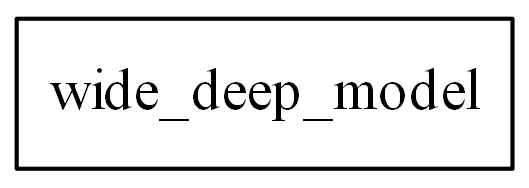


Model Summaries:
Model: "wide_deep_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
linear_model (LinearModel)   multiple                  17        
_________________________________________________________________
model (Functional)           (None, 1)                 29476865  
Total params: 29,476,882
Trainable params: 29,444,114
Non-trainable params: 32,768
_________________________________________________________________


None


Model: "linear_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  16        
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


None


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              34816     
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
activation_1 (Activation)    (None, 2048)              0    

None



SCORES:


loss       auc  binary_accuracy  precision    recall  f1_score
42  0.020969  0.999847         0.995138   1.000000  0.989830  0.994889
43  0.019206  0.999826         0.991896   0.996575  0.986441  0.991482
44  0.008333  0.999990         0.998379   1.000000  0.996610  0.998302
45  0.012472  0.999963         0.996759   0.996610  0.996610  0.996610
46  0.014088  0.999874         0.995138   1.000000  0.989830  0.994889

val_loss   val_auc  val_binary_accuracy  val_precision  val_recall  \
42  0.806718  0.824639             0.750000       0.770115      0.8375   
43  0.838552  0.810817             0.765152       0.769231      0.8750   
44  0.866591  0.811058             0.757576       0.750000      0.9000   
45  0.886970  0.810938             0.757576       0.750000      0.9000   
46  0.916494  0.814904             0.757576       0.744898      0.9125   

    val_f1_score  
42      0.802395  
43      0.818713  
44      0.818182  
45      0.818182  
46      0.820225


History df saved to C:\Python\Python_Data_Science_Exercises\datasets\hdf_keras_tuner_ks_wd_model.csv.feather

Minimum Validation Loss: 0.5998
Minimum Loss: 0.0083
Maximum Validation Accuracy: 79.5455
Maximum Accuracy: 99.8379
Maximum Validation F1-Score: 82.1192
Maximum F1-Score: 99.8302

CPU times: total: 5min 37s
Wall time: 1min 29s


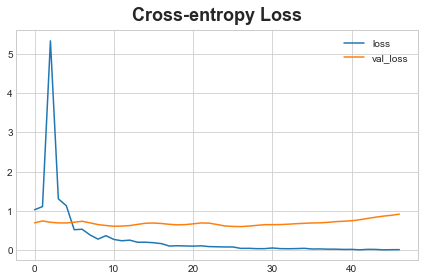

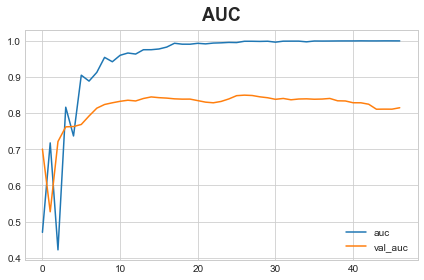

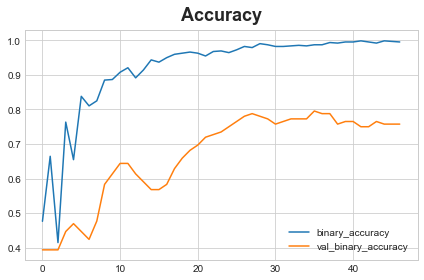

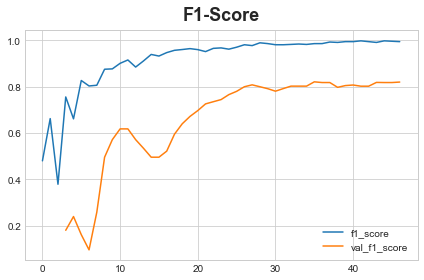

In [104]:
%%time

wd_dict = WideAndDeepModel(tuner_type = 'kt', best_trial = best_trial)

<a id="kt_comparison"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.4 Keras Tuner Tuning Comparison</h2>
</div>

<div class="alert alert-block alert-info">
    <b>Compare metrics before and after Keras Tuner tuning.</b><br><br>
    Comparison is made between the WideAndDeep model results before and after Keras Tuner tuning.
  </div>

In [105]:
def CompareKerasTuner():
    hdf1 = pd.read_feather(f'{workdir}hdf_ks_wd_model.csv.feather')
    hdf2 = pd.read_feather(f'{workdir}hdf_keras_tuner_ks_wd_model.csv.feather')
    
    crc = CompareResults()  # instantiate custom class

    crc.BuildCompare(hdf1, hdf2,
                 'Before KT',     # column 1 name
                 'After KT',      # column 2 name
                 'Binary Accuracy Improvement Using KT Suggested Parameters:'   # title
                )

CompareKerasTuner()

Binary Accuracy Improvement Using KT Suggested Parameters:


Before KT   After KT
Validation Loss               0.516801   0.599793
Validation Binary Accuracy   80.303031  79.545456
Validation F1-Score          84.146343  82.119205
Loss                          0.006953   0.008333
Binary Accuracy             100.000000  99.837923
F1-Score                    100.000000  99.830220

Binary Accuracy Improvement:
Improved by -0.16 percentage points


**With only 2 trials and 2 epochs, the result is not ideal**

In [106]:
model = wd_dict['ks_wide_and_deep_model']
dl = wd_dict['dl_class']

<a id="kt_test_unseen_wd"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Test KT-tuned keras.experimental.WideDeepModel with Unseen Dataset</b>
</div>

In [107]:
PredictUnseen(model_name = 'Keras Tuner with keras.experimental.WideDeepModel')

Please wait, preparing predictions
Unseen Test Data : Keras Tuner with keras.experimental.WideDeepModel Score:
Accuracy for model: 81.95 %



In [113]:
UserInputTest()

UserInputTestMultiple()


User Entry: 1


{'Term': 84,
 'NoEmp': 39,
 'NewExist': 1,
 'CreateJob': 0,
 'RetainedJob': 0,
 'FranchiseCode': 1,
 'UrbanRural': 1,
 'LowDoc': 0,
 'DisbursementGross': 81039,
 'SBA_Appv': 25000,
 'Industry': 33,
 'Recession': 0,
 'RealEstate': 0,
 'SBA_Portion': 50,
 'State_hash': 181805,
 'CityState_hash': 203332}

Prediction: 1
Prediction: Approve The Loan


User Entry: 2


{'Term': 24,
 'NoEmp': 4,
 'NewExist': 1,
 'CreateJob': 0,
 'RetainedJob': 0,
 'FranchiseCode': 1,
 'UrbanRural': 1,
 'LowDoc': 0,
 'DisbursementGross': 50000,
 'SBA_Appv': 25000,
 'Industry': 42,
 'Recession': 0,
 'RealEstate': 0,
 'SBA_Portion': 50,
 'State_hash': 321147,
 'CityState_hash': 699085}

Prediction: 0
Prediction: Do Not Approve The Loan



<i><a style="color:DarkSlateGrey" href="#toc">Back to Table Of Contents</a></i>